In [7]:
import numpy as np
import matplotlib.pyplot as plt
import mesa_reader as mr
import os, sys    # for handling paths
import h5py as h5  #for handling data format
import numpy as np
import matplotlib.pyplot as plt
import mesa_reader as mr 
import pandas as pd

rsol = 6.96e10 #cm
msol = 1.989e33 #grams
lsol = 3.839e33 #ergs

In [3]:
#find a suitible value for param and T_onset that suits the stars with the metalicity and then fit for those. 

In [4]:
def b1_func(z):
    return 14.38*(np.log10(z)**2) + 57.41*np.log10(z) + 95.68

def a2_func(z):
    return -16.91*(np.log10(z)**2) -81.93*np.log10(z) - 47.87

def b2_func(z):
    return 184.02*(np.log10(z)**2) + 872.19*np.log10(z) + 369.75

def c2_func(z):
    return -660.1*(np.log10(z)**2) - 3482.35*np.log10(z) + 1488.91


def M_conv_max_func(star_mass, M_core_max,gamma):
    return star_mass - (1+gamma)*M_core_max

def T_norm_func(logLTAMS, a2, b2 ,c2):
    return a2*logLTAMS**2 + b2*logLTAMS + c2

def M_conv_func(T_eff,T_norm,b1,M_conv_max): #removed a since that should be 1 more or less
    return M_conv_max/(1+np.exp(b1*((T_eff/T_norm)-1)))

#param == log(1/0.99 -1)
#optimum values is for t_onset = 4400 and param = 2.9 correlating to 5% and 95% 
def M_conv_new(T_eff, Tonset, Tmin, M_conv_max, param):
    return M_conv_max/(1+np.exp((-2*param*T_eff + param*Tmin + param*Tonset)/(Tmin - Tonset)))
gamma = 0.1

rsol = 6.96e10 #cm
msol = 1.989e33 #grams
lsol = 3.839e33 #ergs

In [5]:
print(np.log(0.05**-1 -1))
(np.exp(2.9)+1)**-1

2.9444389791664403


0.05215356307841774

Use this block to loop over T_eff or param for a specfic star

4095.4402599344994


/home/lewis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp


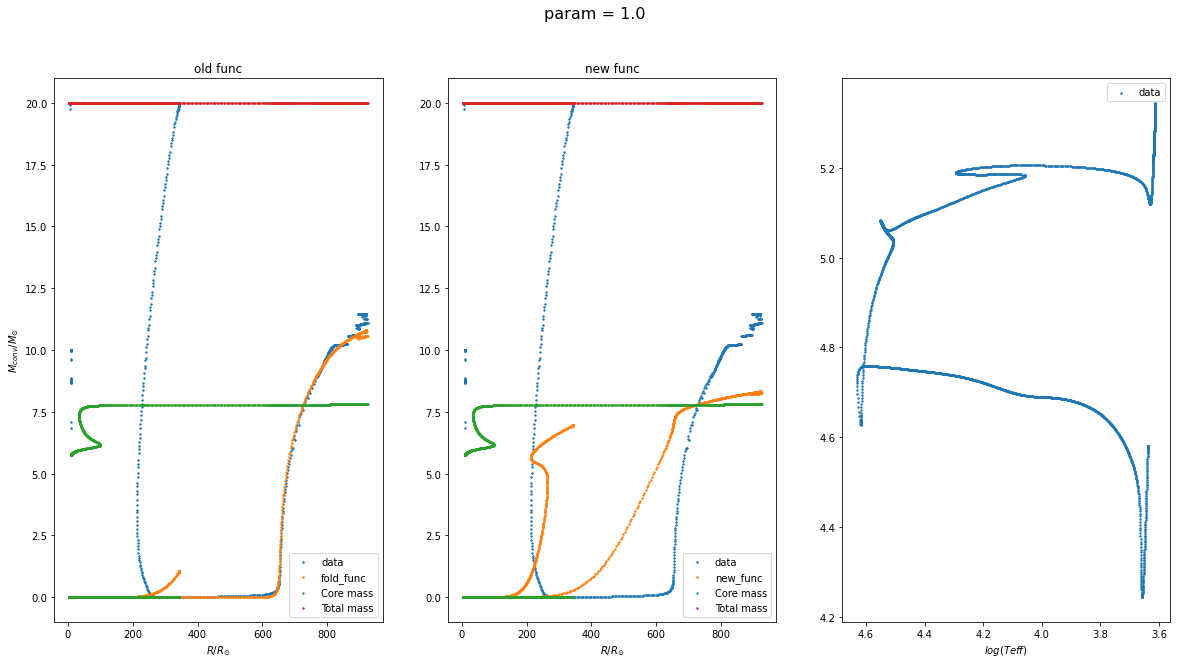

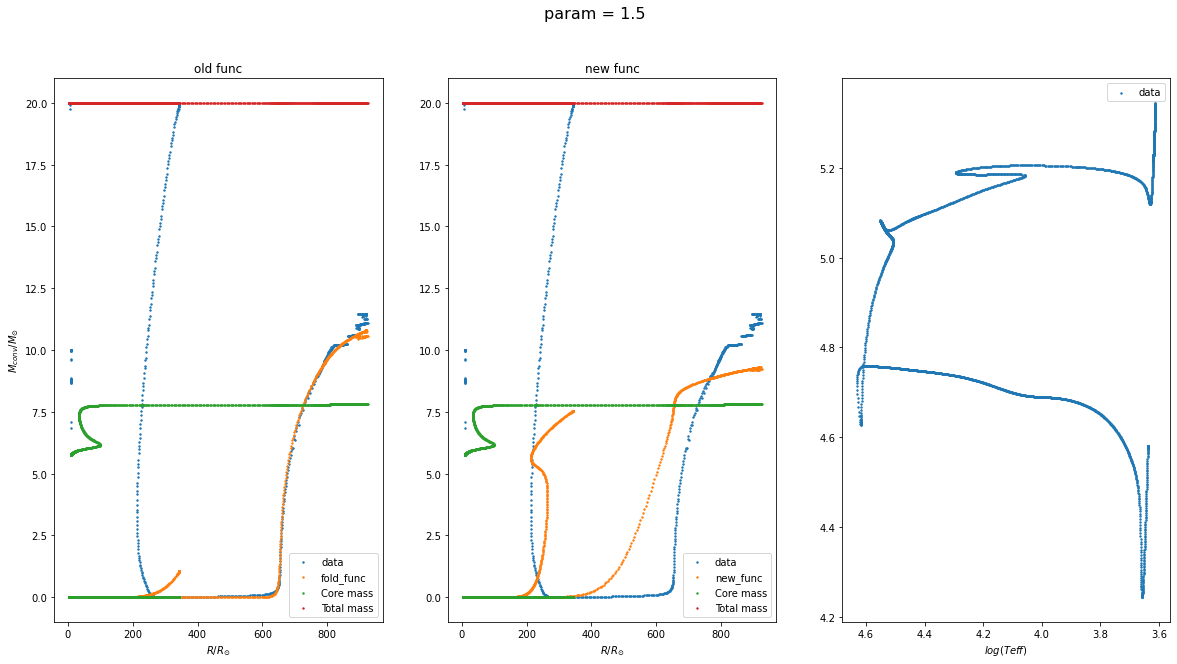

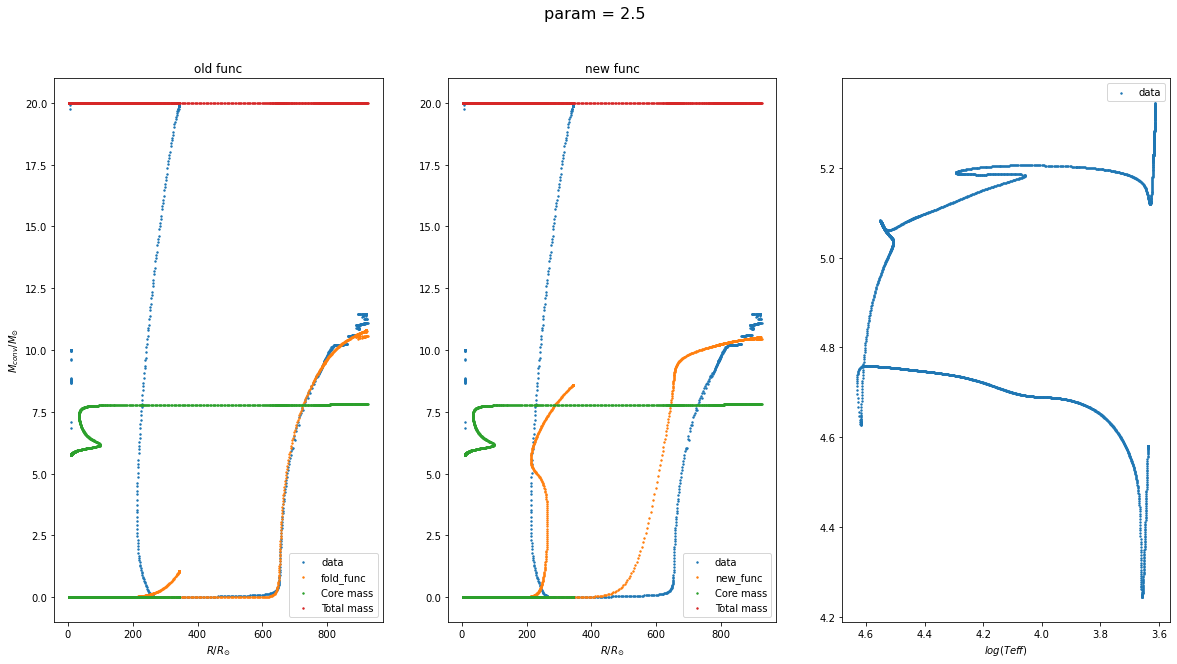

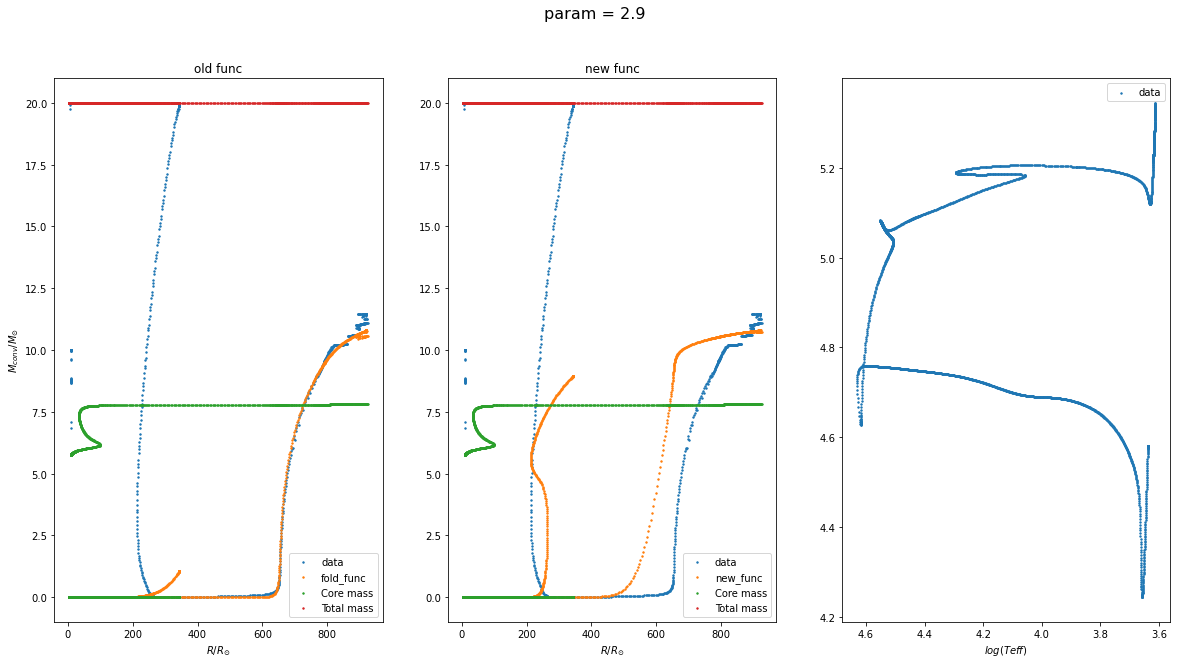

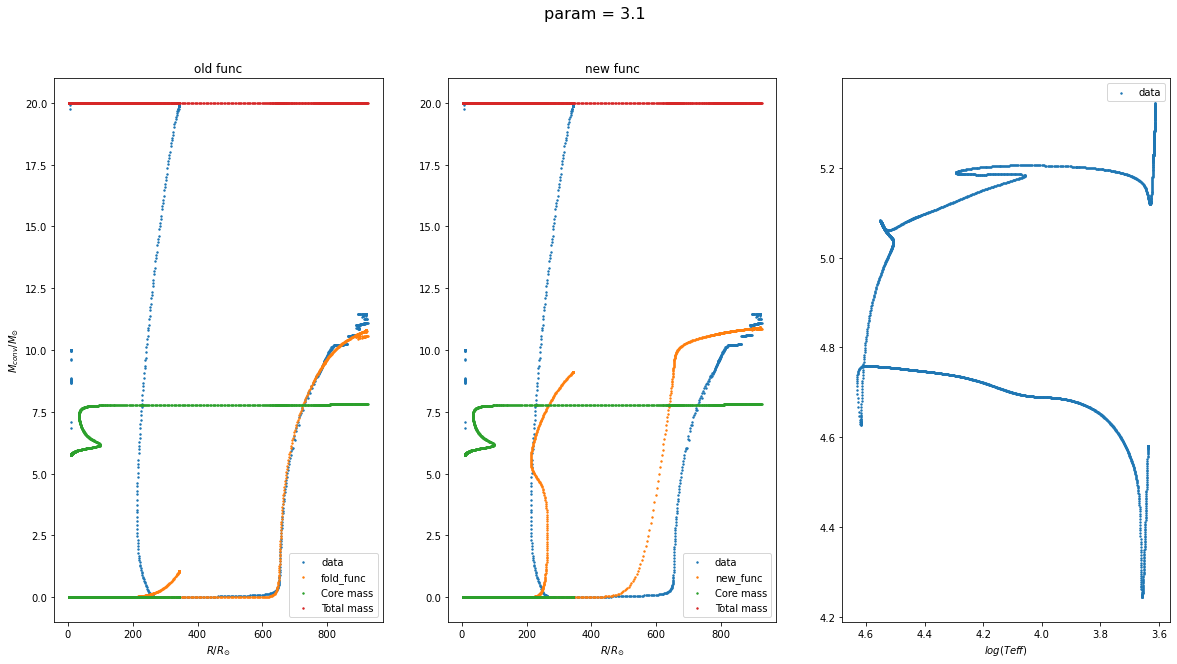

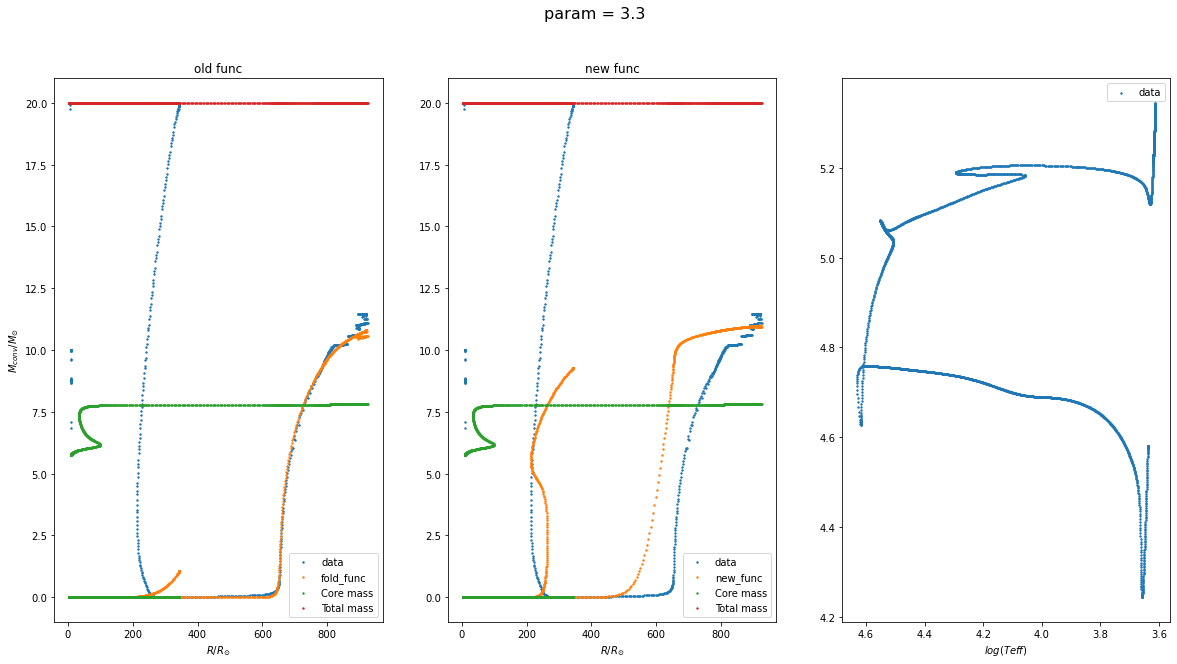

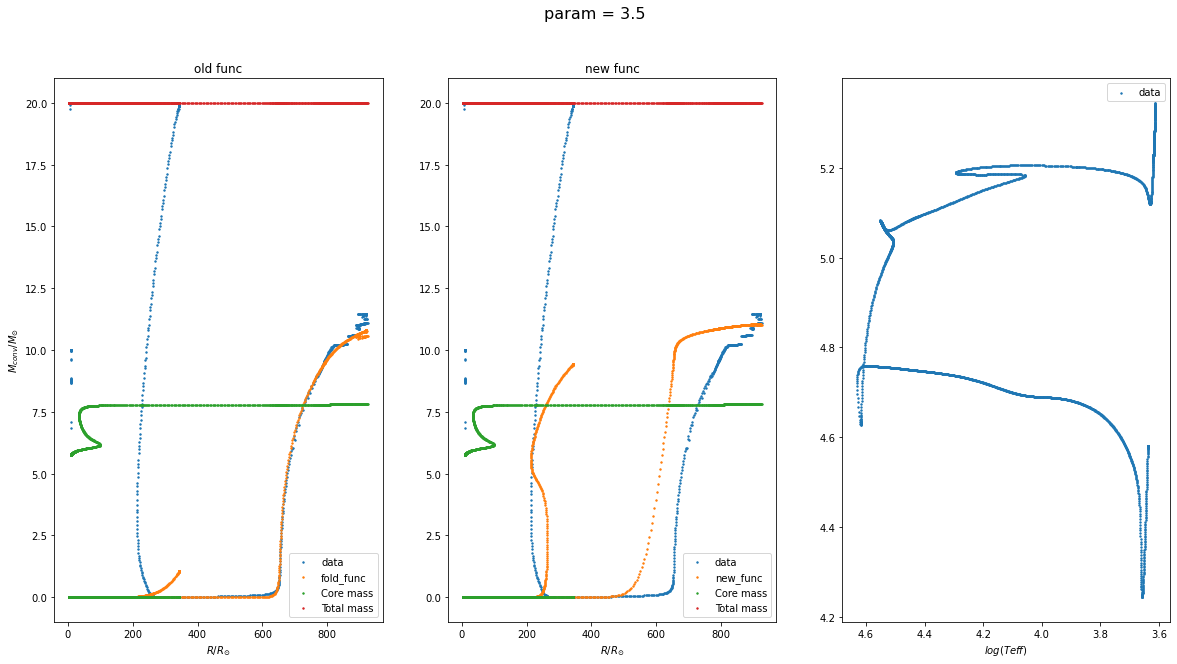

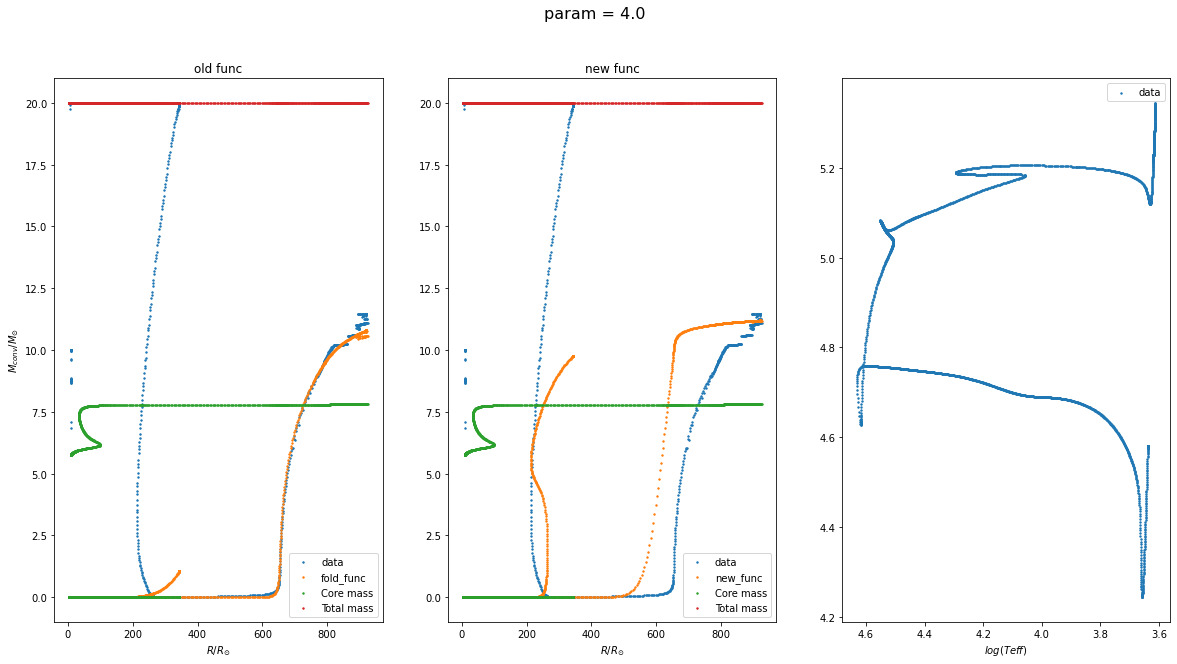

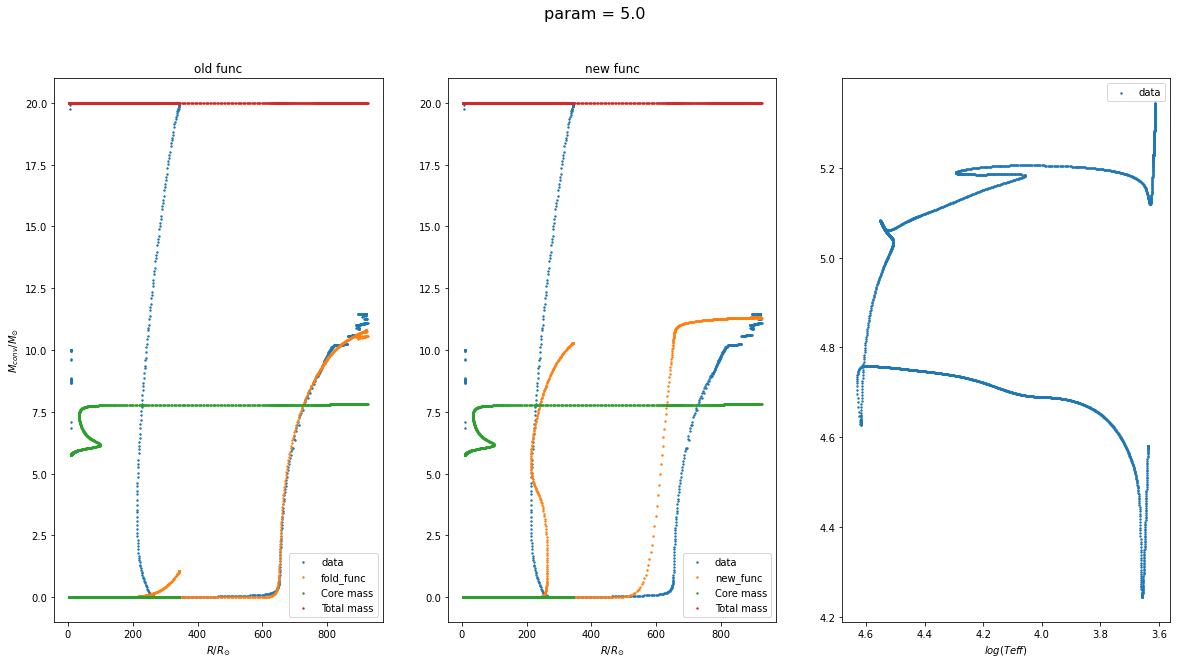

In [26]:
ptf = '/home/lewis/Documents/Honours_Research/data/LOGS/Recombination/001Z/20M/history.data'
h = mr.MesaData(ptf)

tmp = []
for k in range(len(h.star_age)):
    if (h.center_he4[k] > 0.8): #this threshhold for the concentration of he4 reaonable large threshold since peak star expansion occurs after core helium ignition
        tmp.append(h.radius_cm[k])
r_min = min(tmp)
index_l = int(np.where(h.radius_cm == r_min)[0][0])
log_L_TAMS = h.log_L[index_l]
M_core_max = h.he_core_mass[-1]
T_eff = h.effective_T
star_mass = h.star_mass
T_min = min(T_eff)
print(T_min)
#get fits for old model to compare with 
z = 0.00014
b1 = b1_func(z)
a2 = a2_func(z)
b2 = b2_func(z)
c2 = c2_func(z)
M_conv_max = M_conv_max_func(star_mass, M_core_max, gamma)
T_norm = T_norm_func(log_L_TAMS,a2,b2,c2)
M_conv = M_conv_func(T_eff, T_norm, b1, M_conv_max)

#change this from param and t_onset vice versa
# for T_onset in [6000, 5500,5000,4500,4400,4300,4200,4100]:
for param in [1.0,1.5,2.5, 2.9,3.1,3.3,3.5,4.0,5.0]:
    M_conv_n = M_conv_new(T_eff, 5000, T_min, M_conv_max,param = param)
    fig, axs = plt.subplots(1, 3,figsize=(20, 10))

    title = 'param = ' + str(param)
    axs[0].scatter(h.radius_cm/rsol,h.M_conv_env/msol, label = 'data',s=2)
    axs[0].scatter(h.radius_cm/rsol,M_conv, label = 'fold_func',s=2)
    axs[0].scatter(h.radius_cm/rsol, h.he_core_mass, label = 'Core mass',s=2)
    axs[0].scatter(h.radius_cm/rsol, h.star_mass, label = 'Total mass',s=2)
    axs[0].set_ylabel('$M_{conv}/M_{\odot}$')
    axs[0].set_xlabel('$R/R_{\odot}$')
    axs[0].set_title('old func')
    axs[0].legend()


    axs[1].scatter(h.radius_cm/rsol,h.M_conv_env/msol, label = 'data',s=2)
    axs[1].scatter(h.radius_cm/rsol,M_conv_n, label = 'new_func',s=2)
    axs[1].scatter(h.radius_cm/rsol, h.he_core_mass, label = 'Core mass',s=2)
    axs[1].scatter(h.radius_cm/rsol, h.star_mass, label = 'Total mass',s=2)
    axs[1].set_xlabel('$R/R_{\odot}$')
    axs[1].set_title('new func')
    axs[1].legend()

    axs[2].scatter(np.log10(T_eff),h.log_L, label = 'data',s=2)
    axs[2].set_xlabel('$log(Teff)$')
    axs[2].legend()
    axs[2].invert_xaxis()

    fig.suptitle(title, fontsize=16)
    plt.legend()
    plt.show()

###### Use this block to Check if the other stars work well with those parameters


4127.5174948396425


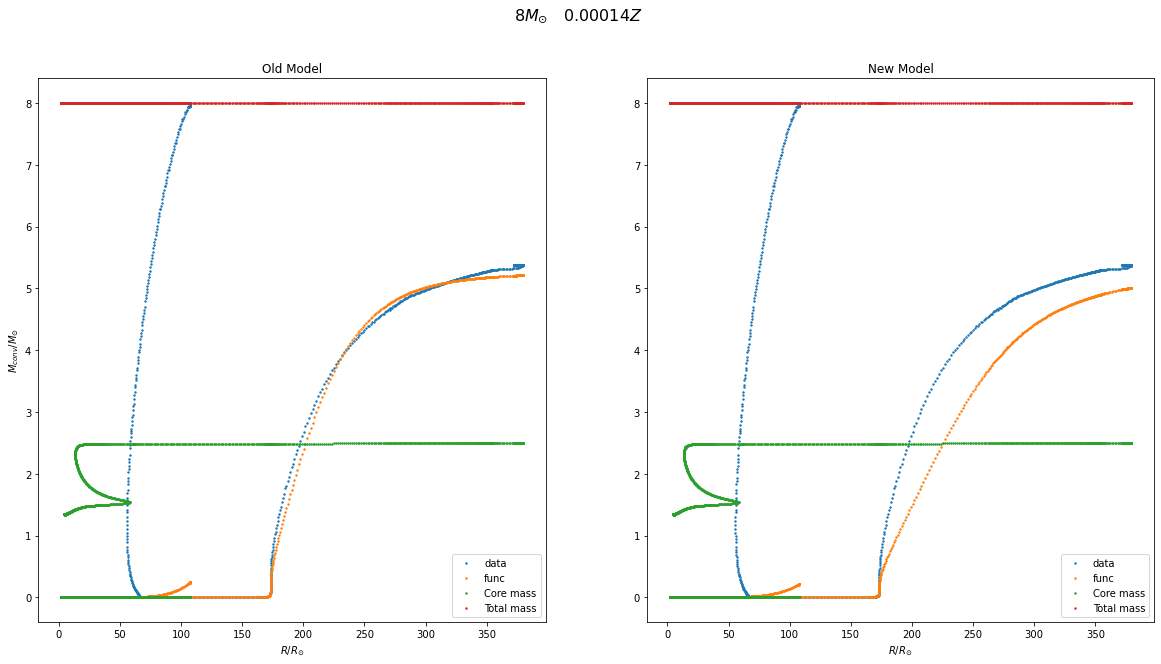

4099.128331426625


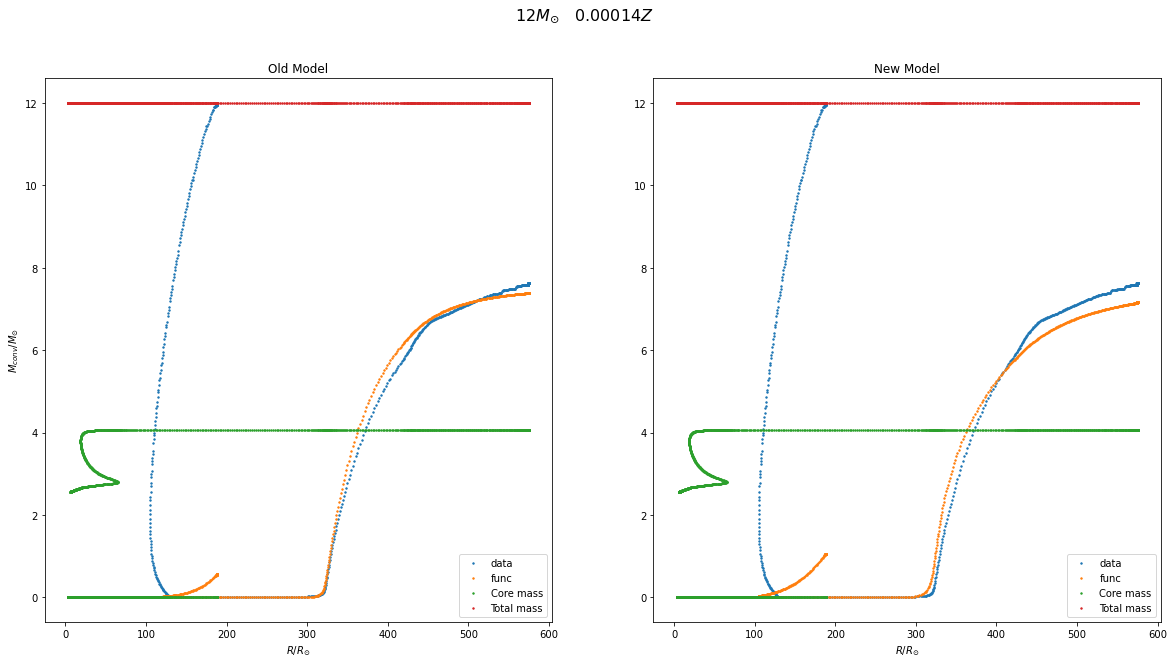

4088.798685165067


/home/lewis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp


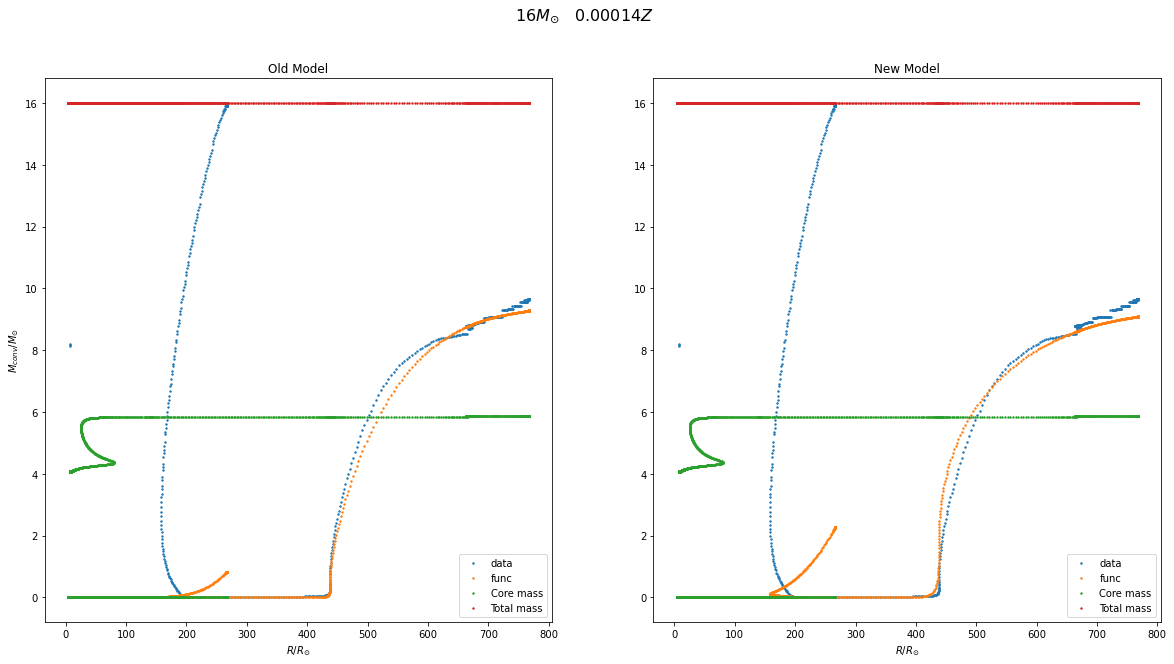

4095.4402599344994


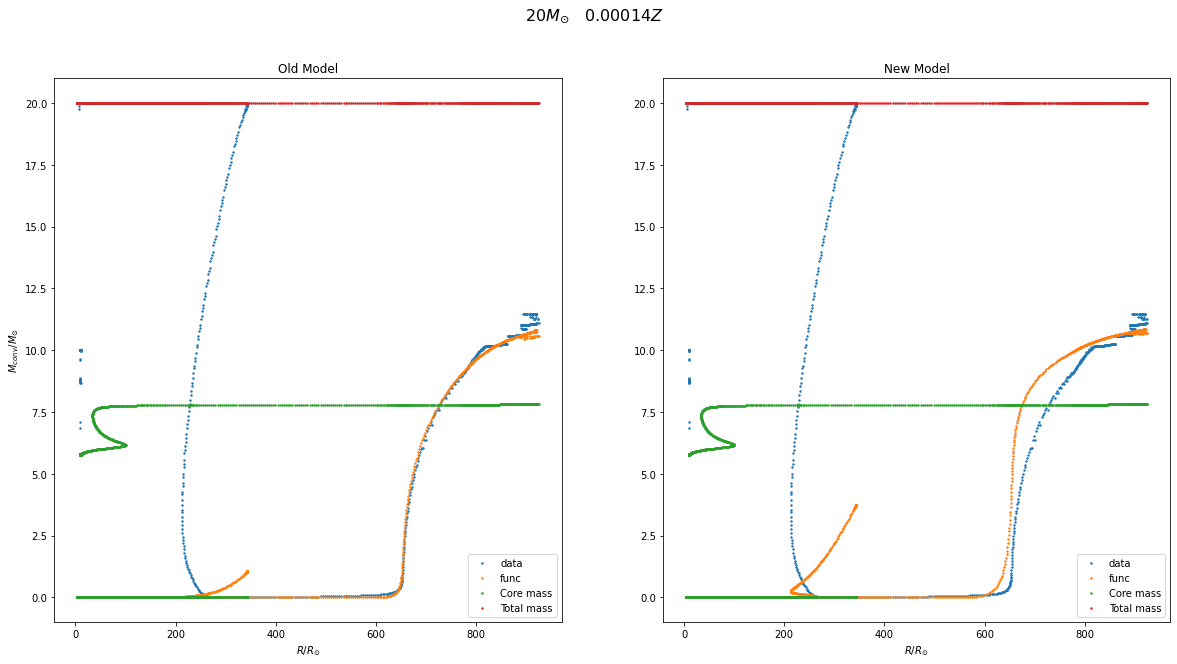

4110.047895831504


/home/lewis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp


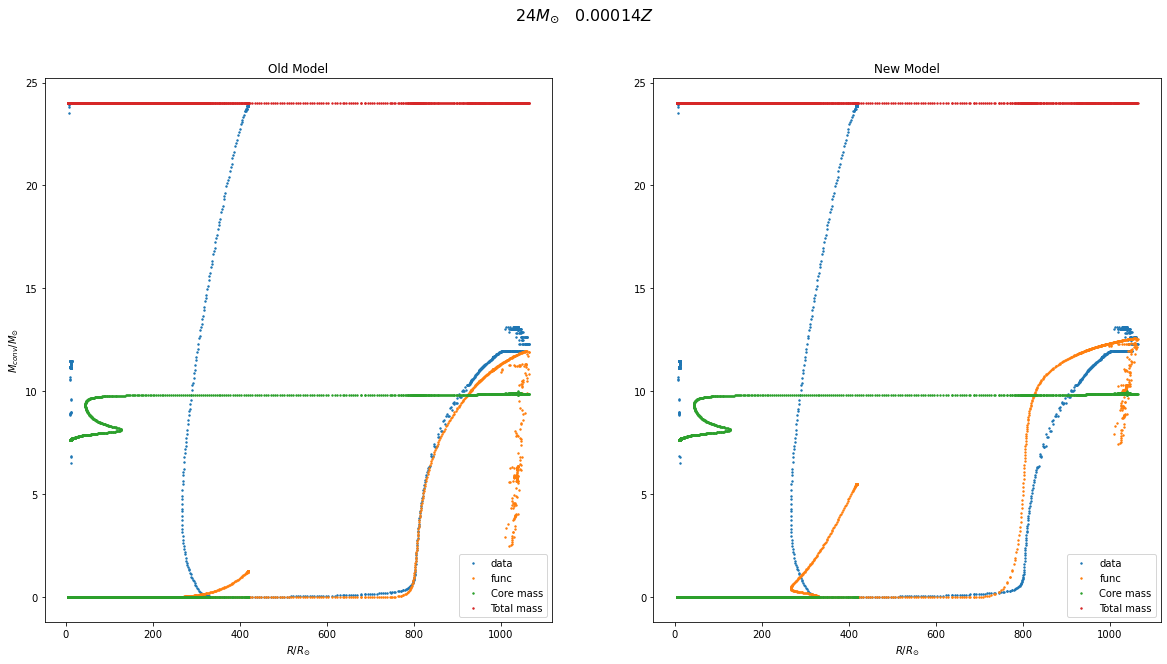

3818.348229849309


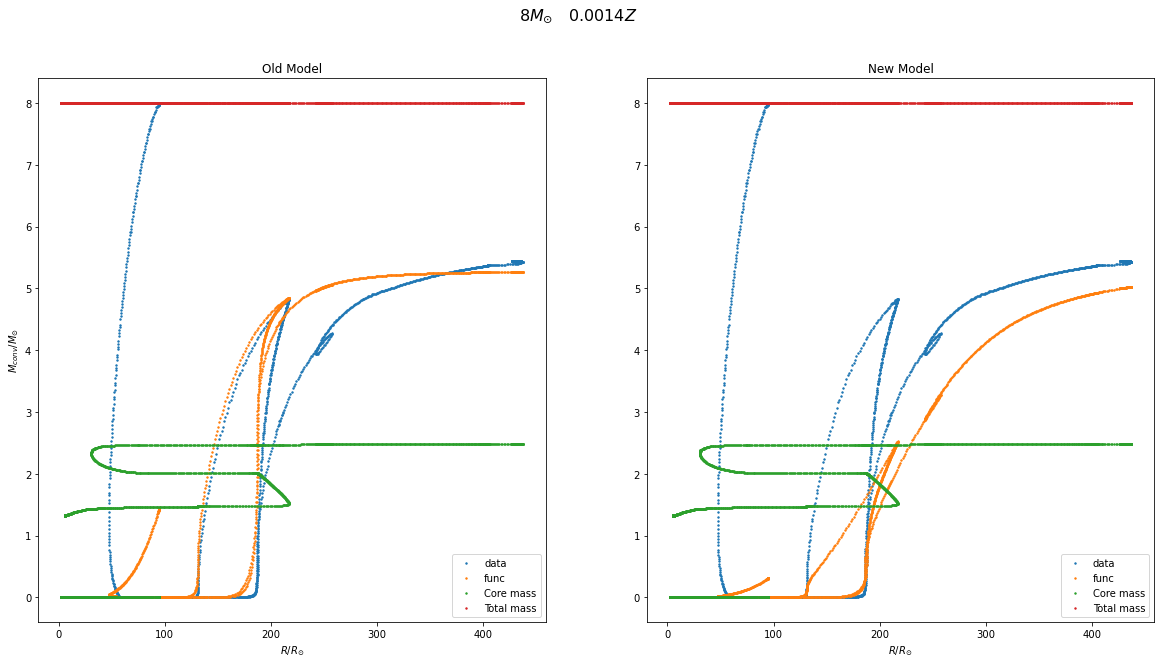

3786.967310729925


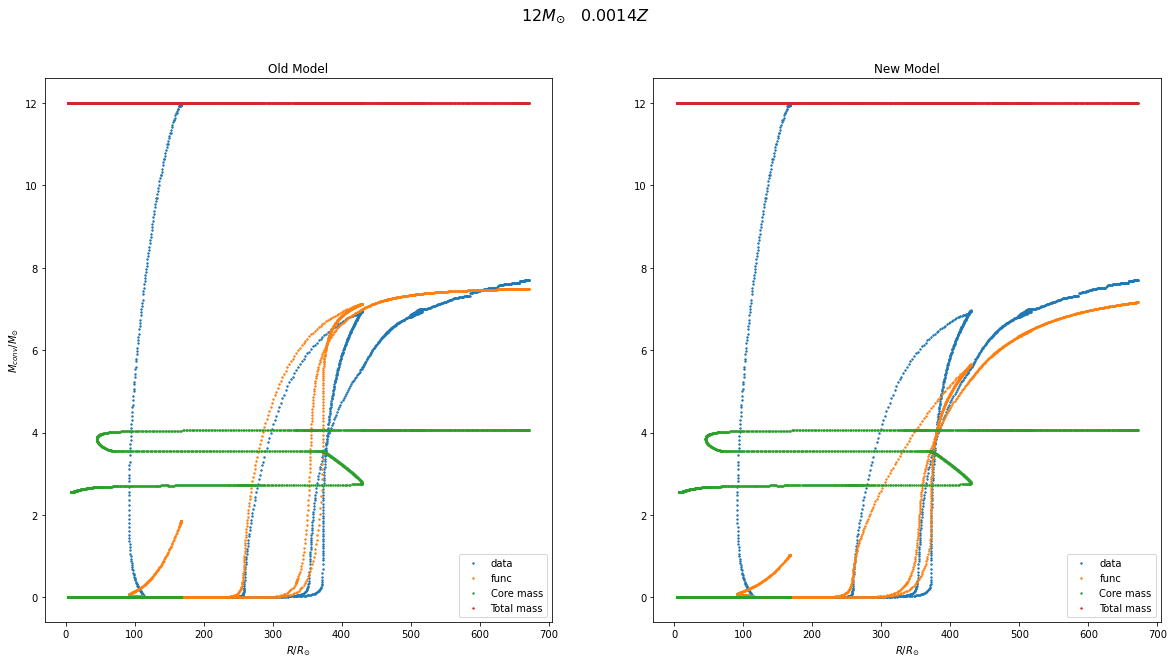

3783.325248562544


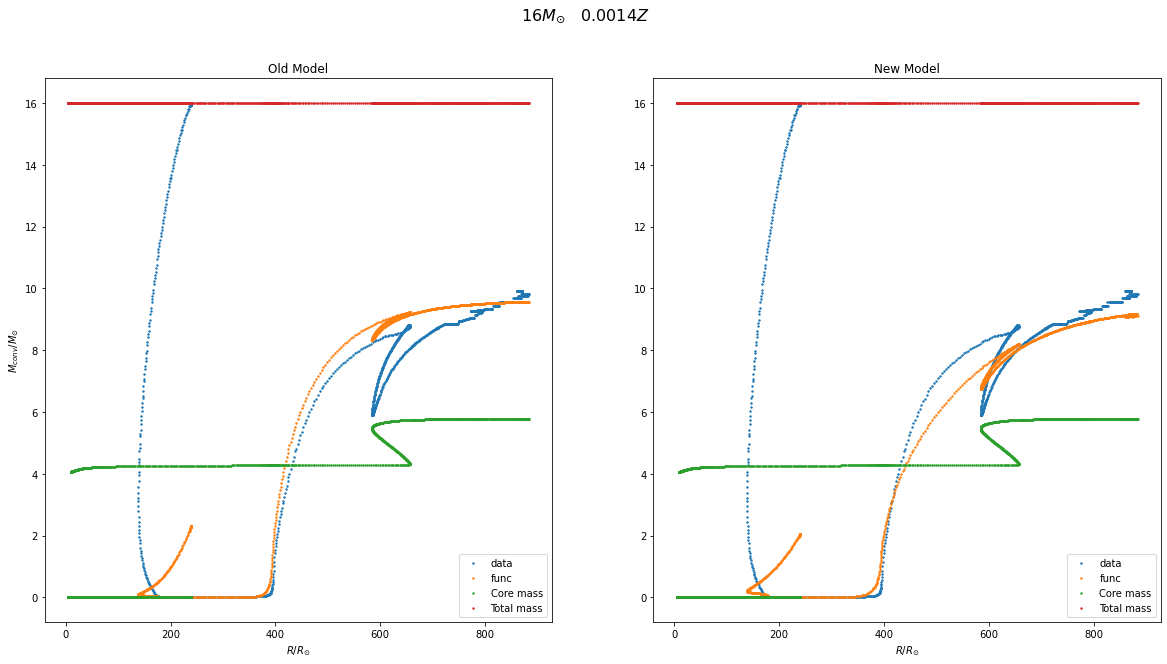

3807.1783975245644


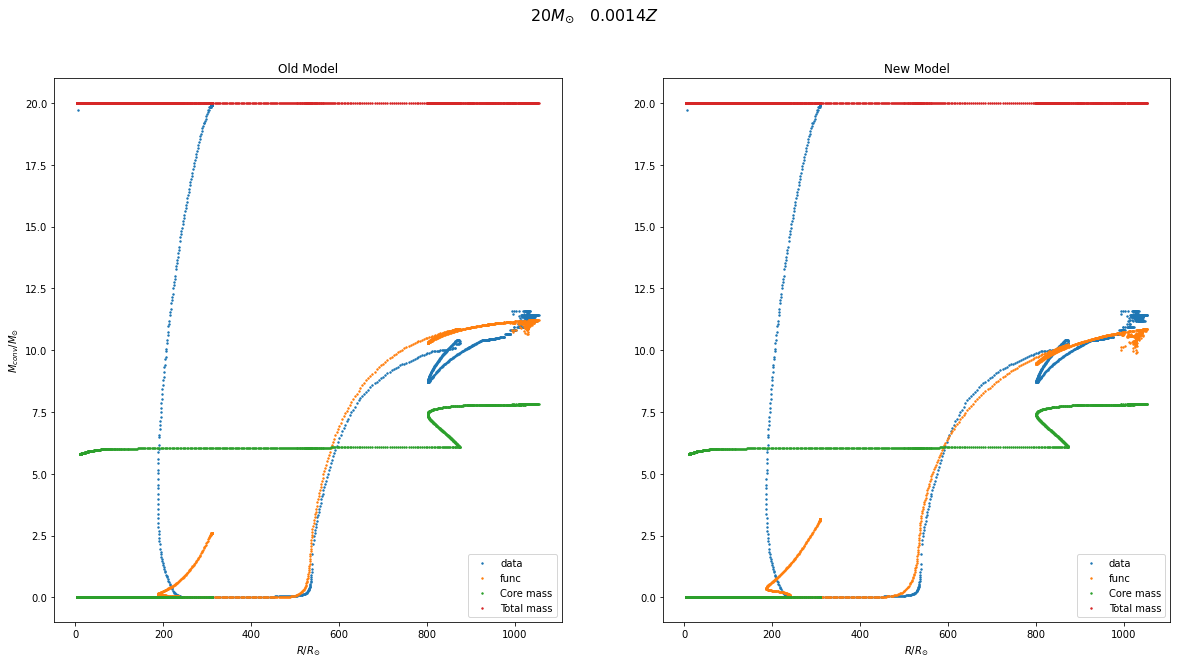

3846.5789399720934


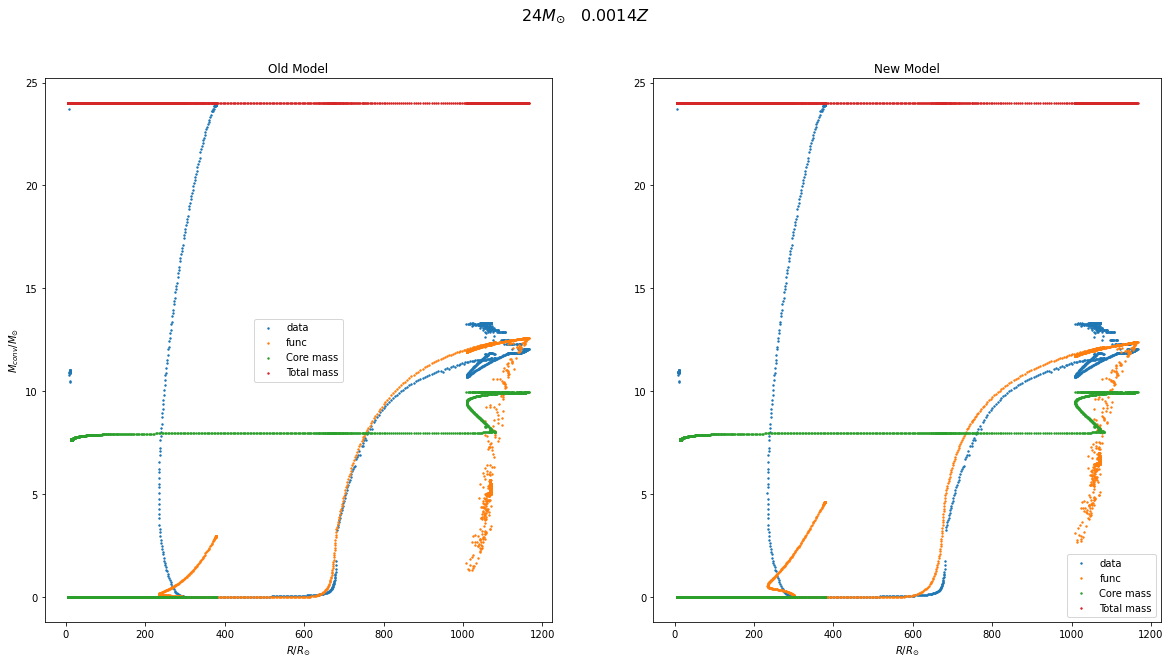

3322.692816496168


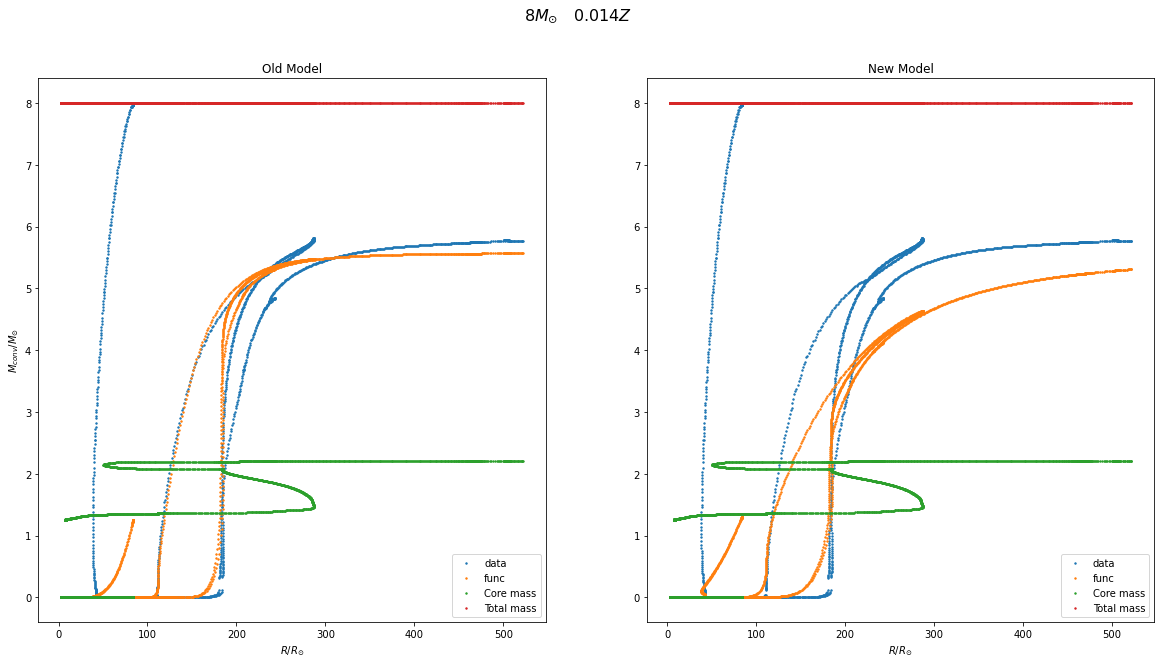

3267.6207173268826


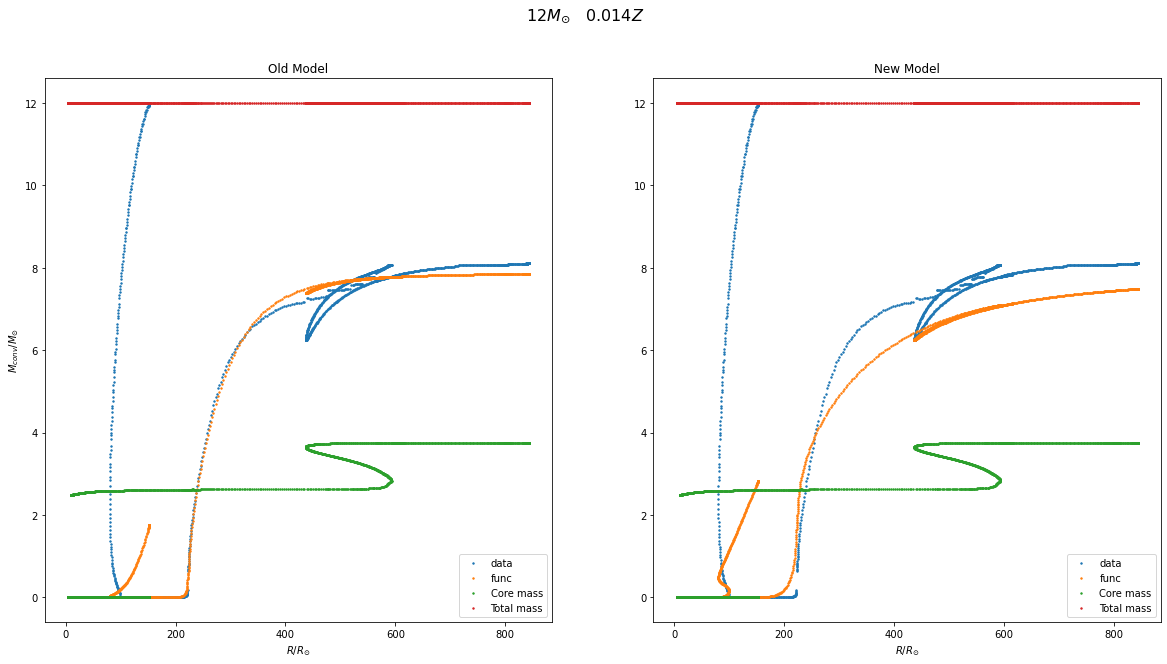

3266.966463018747


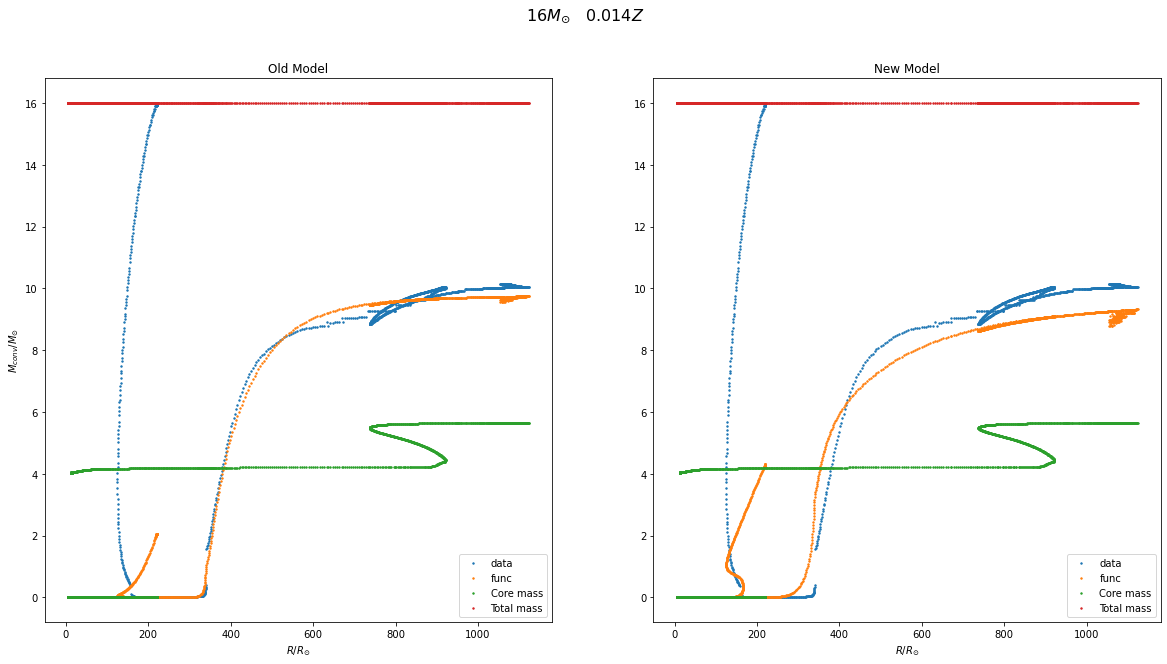

3319.1468246106942


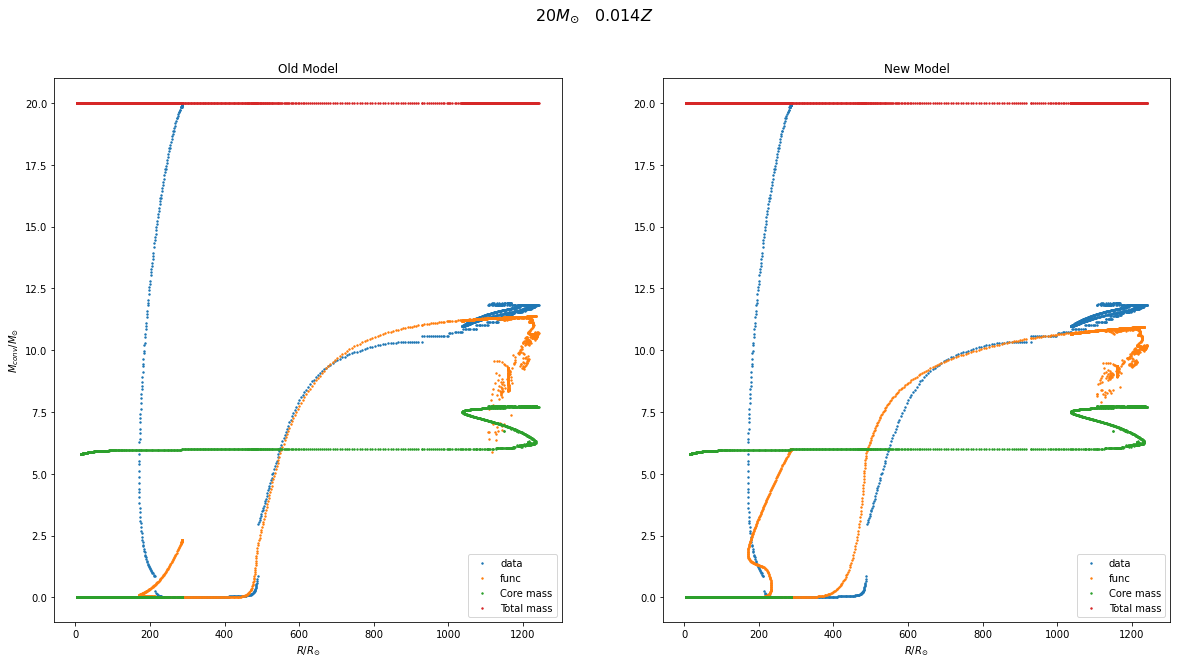

3366.7592860792265


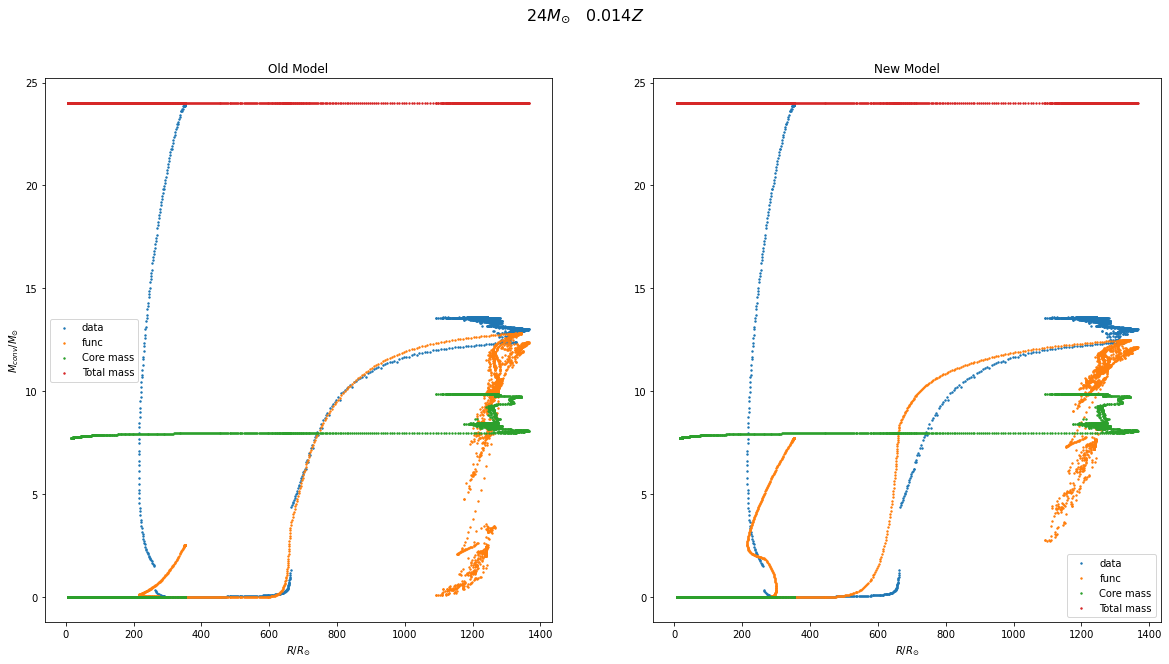

3103.159366872239


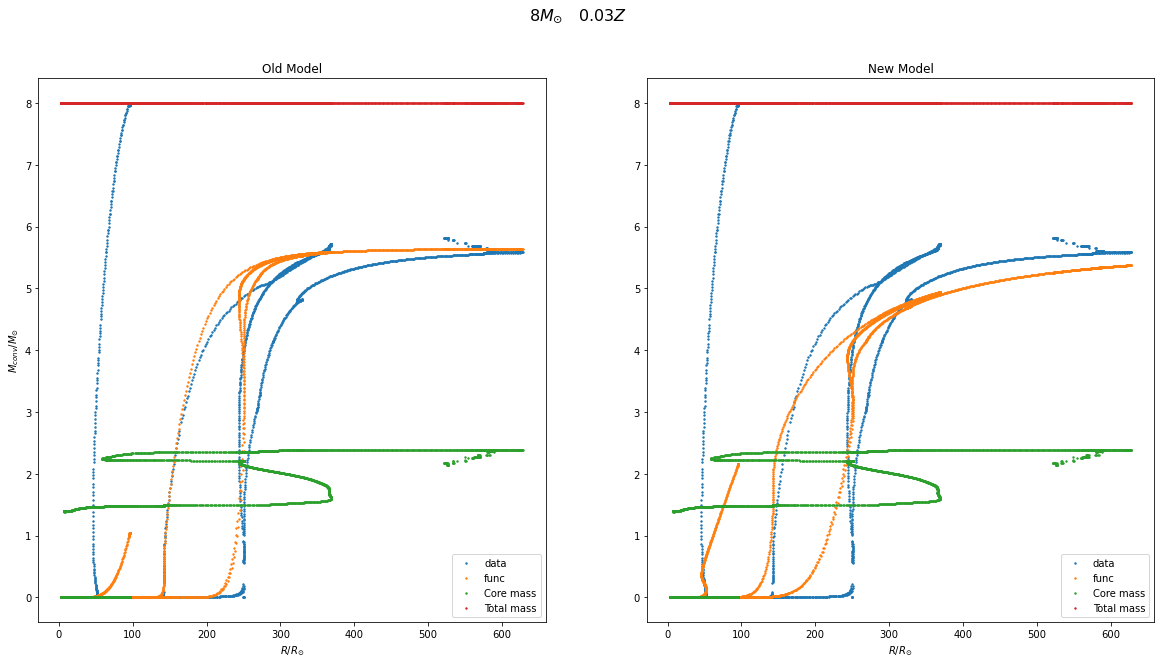

3038.833813662487


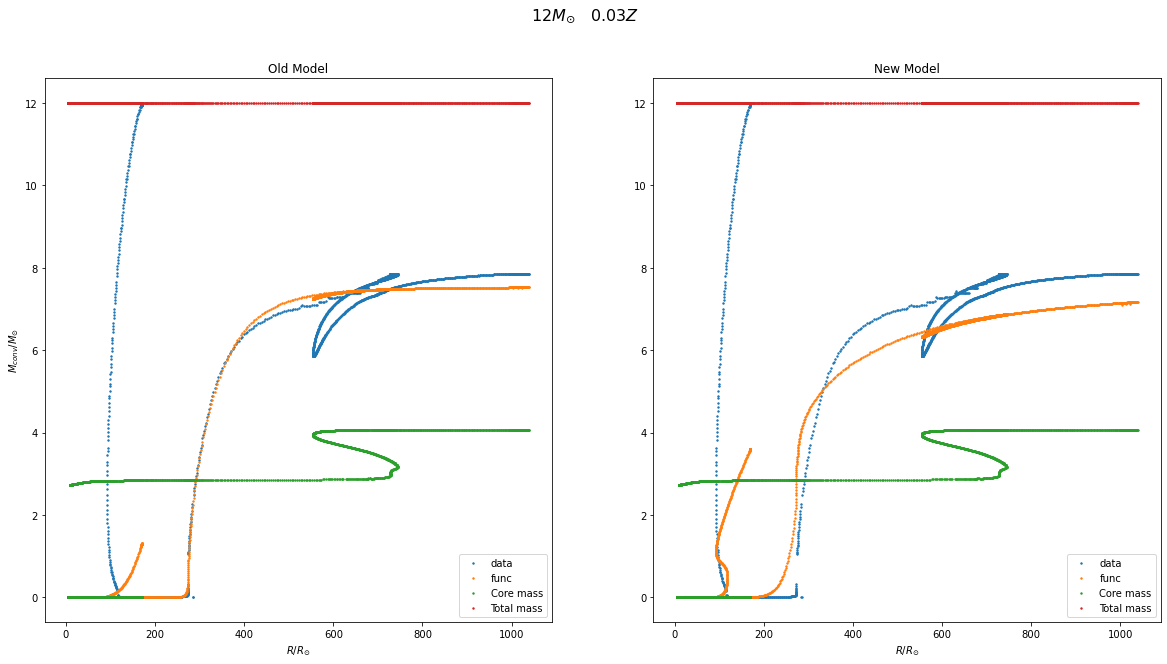

3091.4780438490493


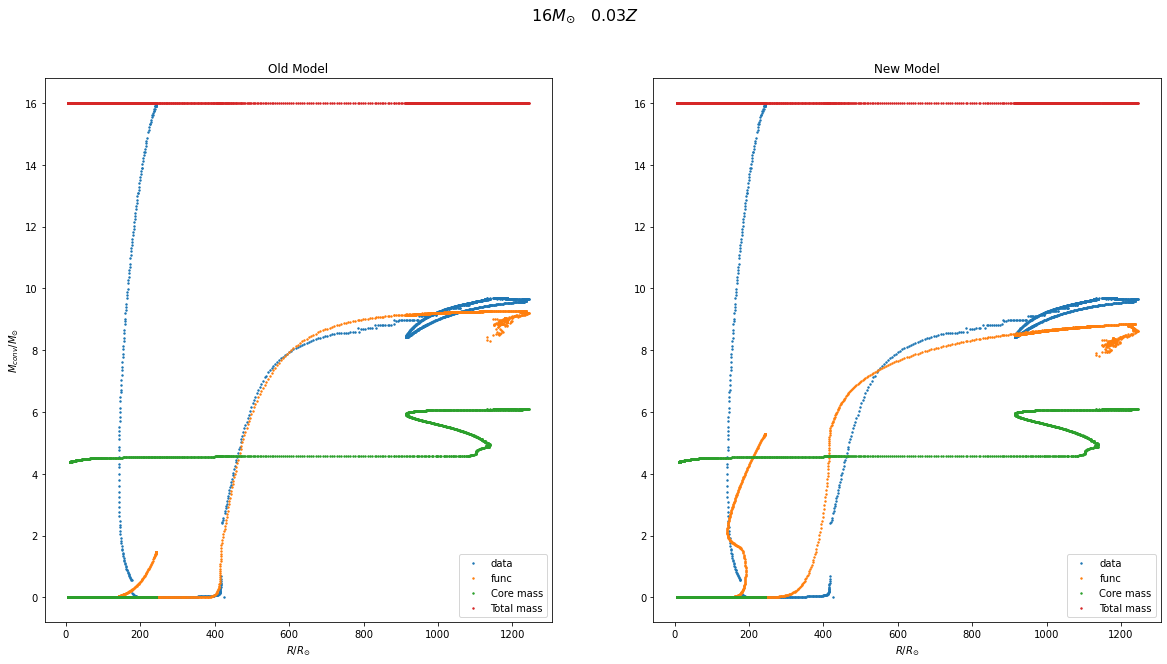

3119.657020908344


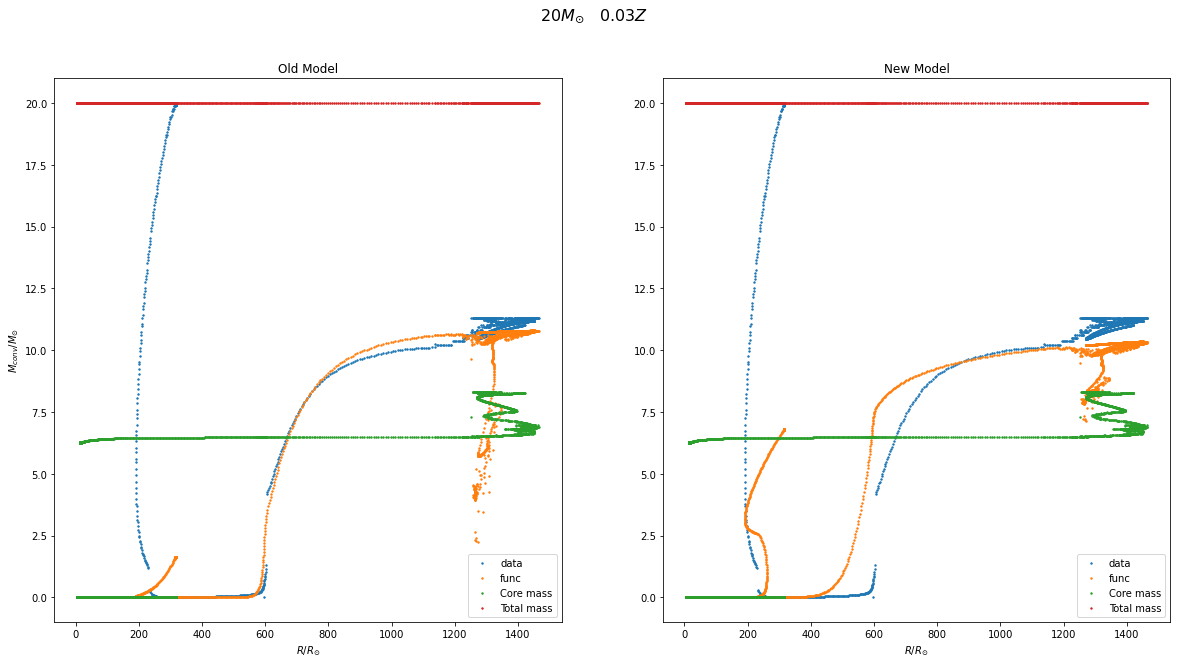

3188.846871342617


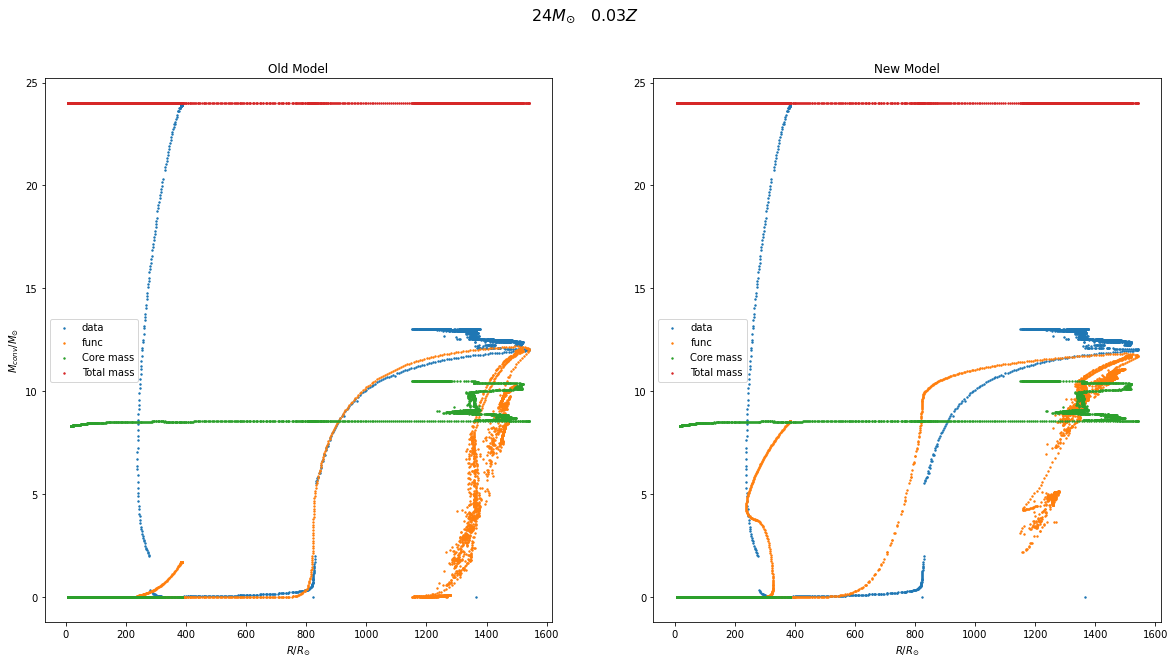

In [6]:
param = 3.0
T_onset = 4400

z_dir = ['001Z/','01Z/','1Z/','2Z/']
for i in z_dir:
    pwd = '/home/lewis/Documents/Honours_Research/data/LOGS/Recombination/' + i 
    star_mass = [8,12,16,20,24]
    for j in star_mass:

        ptf = pwd + str(j) +'M/history.data'
        h = mr.MesaData(ptf)
        tmp = []
        for k in range(len(h.star_age)):
            if (h.center_he4[k] > 0.8): #this threshhold for the concentration of he4 reaonable large threshold since peak star expansion occurs after core helium ignition
                tmp.append(h.radius_cm[k])
        r_min = min(tmp)
        index_l = int(np.where(h.radius_cm == r_min)[0][0])
        log_L_TAMS = h.log_L[index_l]
        M_core_max = h.he_core_mass[-1]
        T_eff = h.effective_T
        star_mass = h.star_mass
        T_min = min(T_eff)
        print(T_min)


        if i == '001Z/':
            z = 0.00014
        elif i == '01Z/':
            z = 0.0014
        elif i == '1Z/':
            z = 0.014
        else:
            z = 0.03

        b1 = b1_func(z)
        a2 = a2_func(z)
        b2 = b2_func(z)
        c2 = c2_func(z)

        M_conv_max = M_conv_max_func(star_mass, M_core_max, gamma)
        T_norm = T_norm_func(log_L_TAMS,a2,b2,c2)
        M_conv = M_conv_func(T_eff, T_norm, b1, M_conv_max)
        
        T_onset = 4500
        param = 3.0
        M_conv_n = M_conv_new(T_eff, T_onset, T_min, M_conv_max,param)

        fig, axs = plt.subplots(1, 2,figsize=(20, 10))
        
        title = str(j) +"$M_{\odot}$   " + str(z) + "$Z$"
        axs[0].scatter(h.radius_cm/rsol,h.M_conv_env/msol, label = 'data',s=2)
        axs[0].scatter(h.radius_cm/rsol,M_conv, label = 'func',s=2)
        axs[0].scatter(h.radius_cm/rsol, h.he_core_mass, label = 'Core mass',s=2)
        axs[0].scatter(h.radius_cm/rsol, h.star_mass, label = 'Total mass',s=2)
        axs[0].set_ylabel('$M_{conv}/M_{\odot}$')
        axs[0].set_xlabel('$R/R_{\odot}$')
        axs[0].set_title('Old Model')
        axs[0].legend()
        
        
        axs[1].scatter(h.radius_cm/rsol,h.M_conv_env/msol, label = 'data',s=2)
        axs[1].scatter(h.radius_cm/rsol,M_conv_n, label = 'func',s=2)
        axs[1].scatter(h.radius_cm/rsol, h.he_core_mass, label = 'Core mass',s=2)
        axs[1].scatter(h.radius_cm/rsol, h.star_mass, label = 'Total mass',s=2)
        axs[1].set_xlabel('$R/R_{\odot}$')
        axs[1].set_title('New Model')
        axs[1].legend()
        
#         axs[2].scatter(np.log10(h.effective_T), h.log_L,s=2)
#         axs[2].set_xlabel('Surface Temp (K)')
#         axs[2].set_ylabel("log10(L)")
#         axs[2].invert_xaxis()
#         axs[2].legend()
        
        fig.suptitle(title, fontsize=16)
        plt.legend()
        
        if j == 20:
            plt.savefig(str(z) + 'convective_fit.pdf')
        plt.show()

    

/home/lewis/Documents/Honours_Research/data/LOGS/LOGS_001Zsun_updatedovershoot/8Msun_001Zsun_sc01/history.data


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


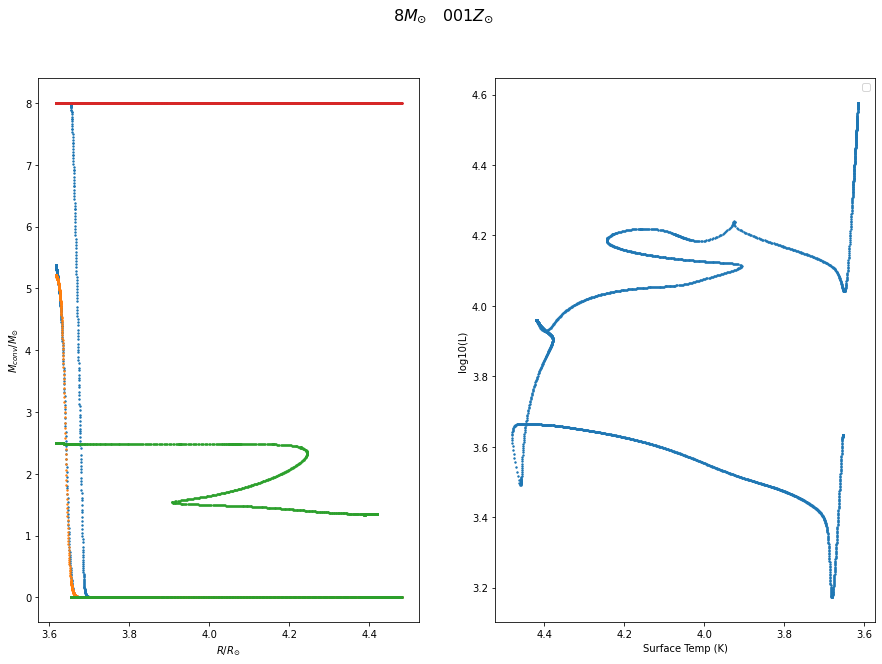

/home/lewis/Documents/Honours_Research/data/LOGS/LOGS_001Zsun_updatedovershoot/12Msun_001Zsun_sc01/history.data


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


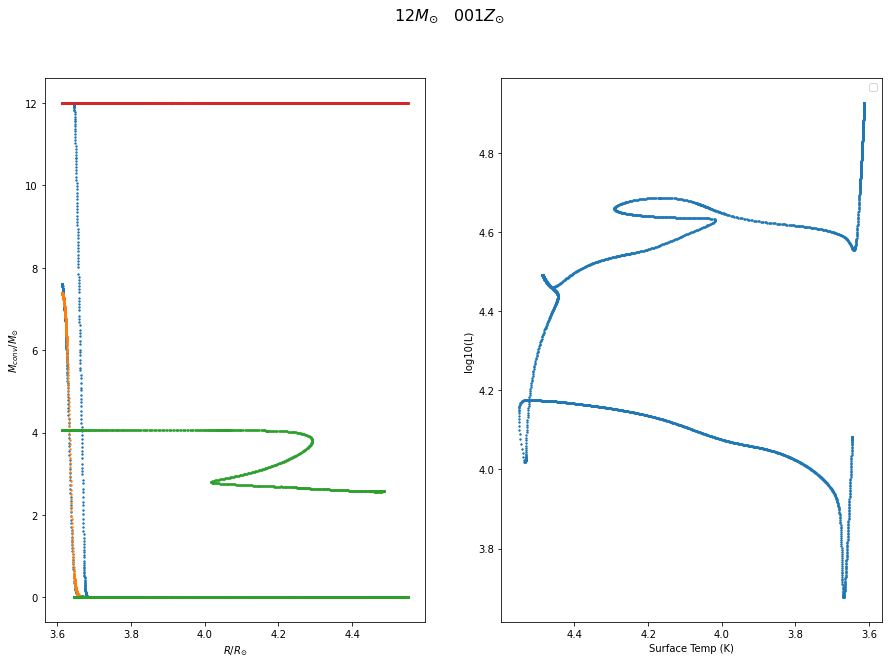

/home/lewis/Documents/Honours_Research/data/LOGS/LOGS_001Zsun_updatedovershoot/16Msun_001Zsun_sc01/history.data


/home/lewis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


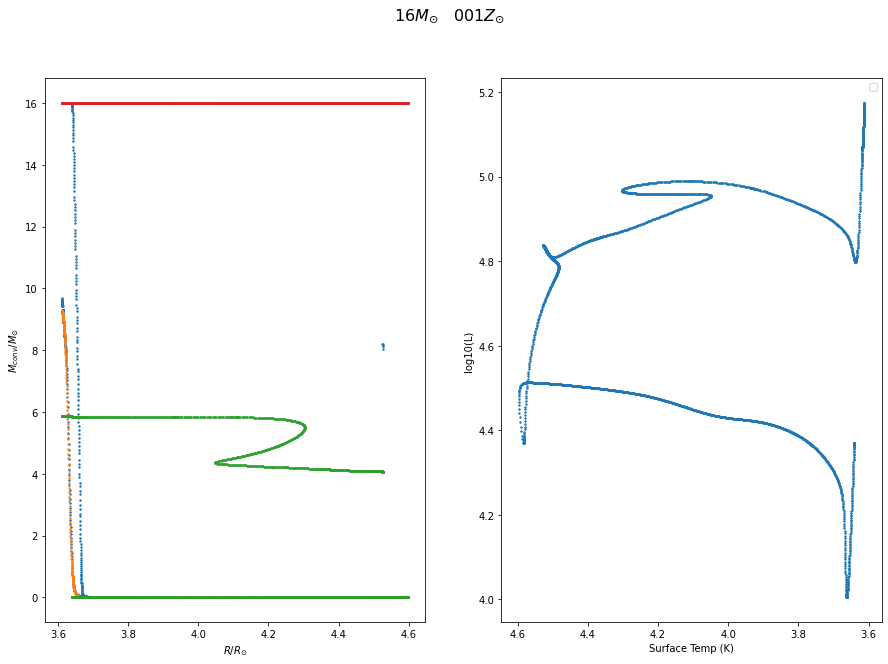

/home/lewis/Documents/Honours_Research/data/LOGS/LOGS_001Zsun_updatedovershoot/20Msun_001Zsun_sc01/history.data


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


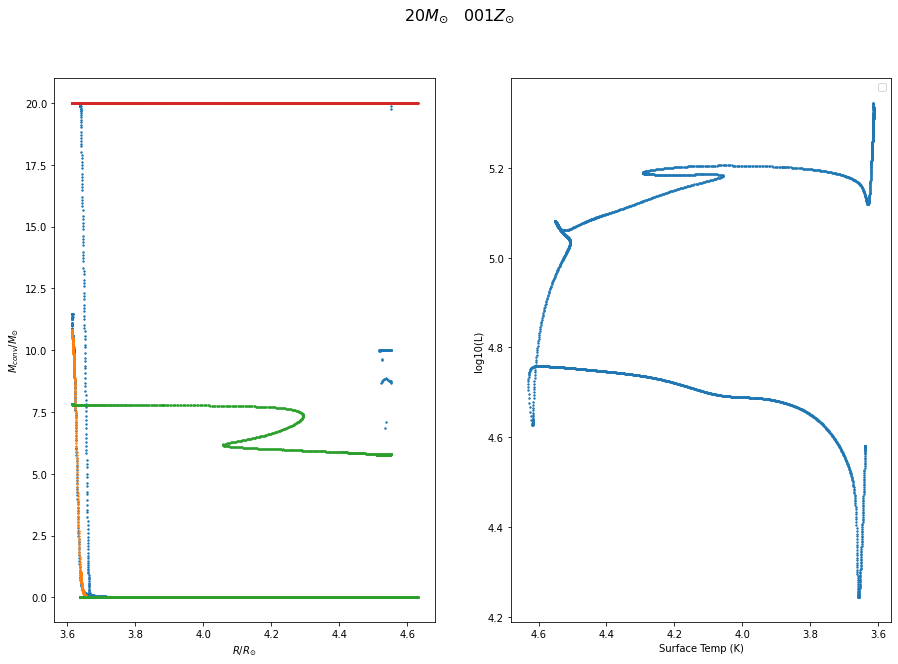

/home/lewis/Documents/Honours_Research/data/LOGS/LOGS_001Zsun_updatedovershoot/24Msun_001Zsun_sc01/history.data


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


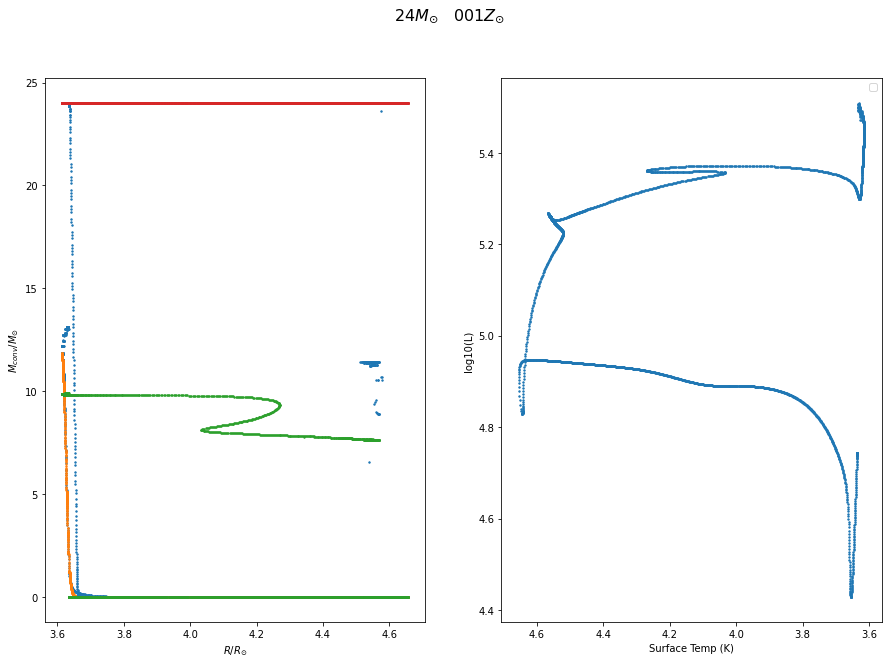

/home/lewis/Documents/Honours_Research/data/LOGS/LOGS_01Zsun_updatedovershoot/8Msun_01Zsun_sc01/history.data


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


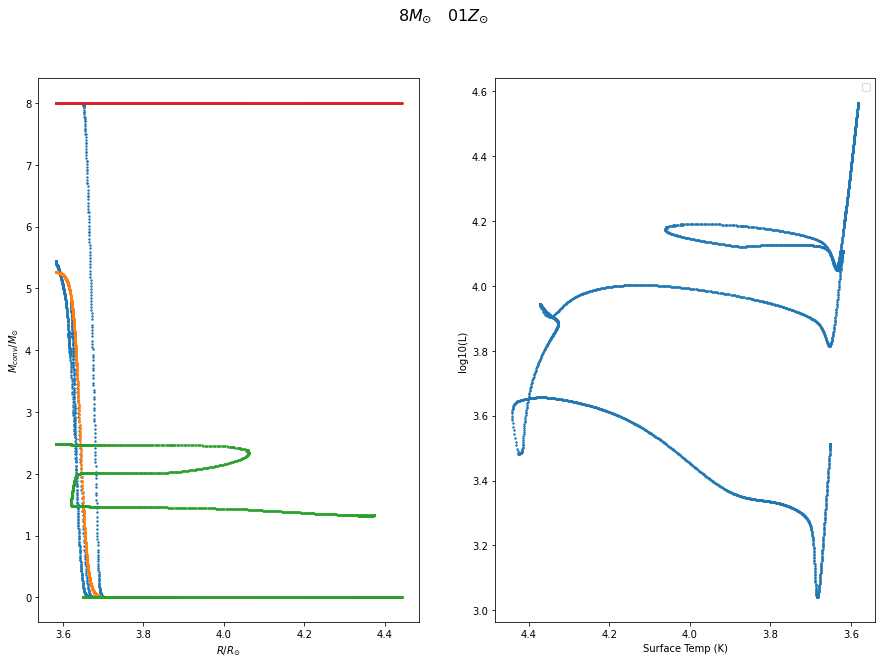

/home/lewis/Documents/Honours_Research/data/LOGS/LOGS_01Zsun_updatedovershoot/12Msun_01Zsun_sc01/history.data


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


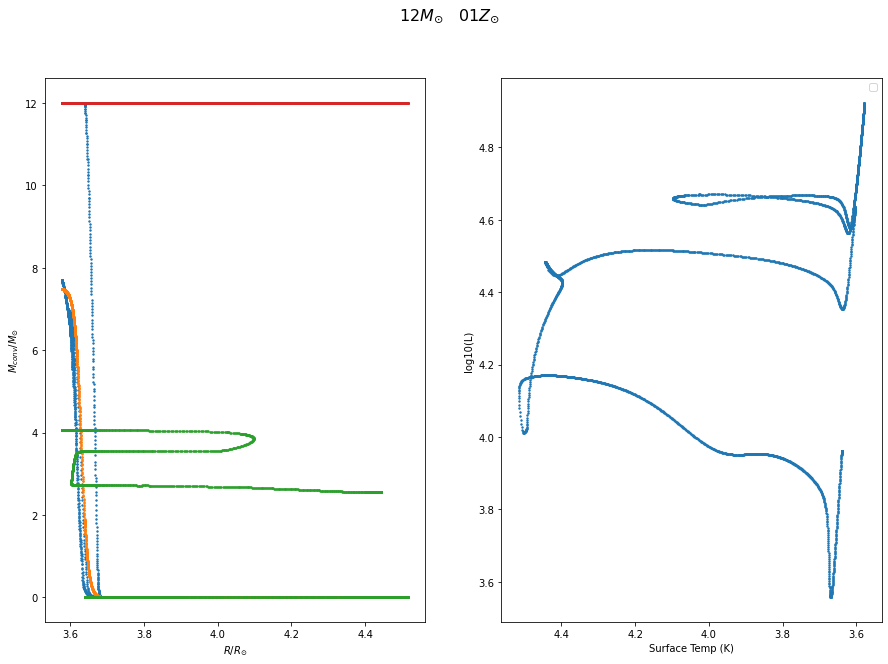

/home/lewis/Documents/Honours_Research/data/LOGS/LOGS_01Zsun_updatedovershoot/16Msun_01Zsun_sc01/history.data


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


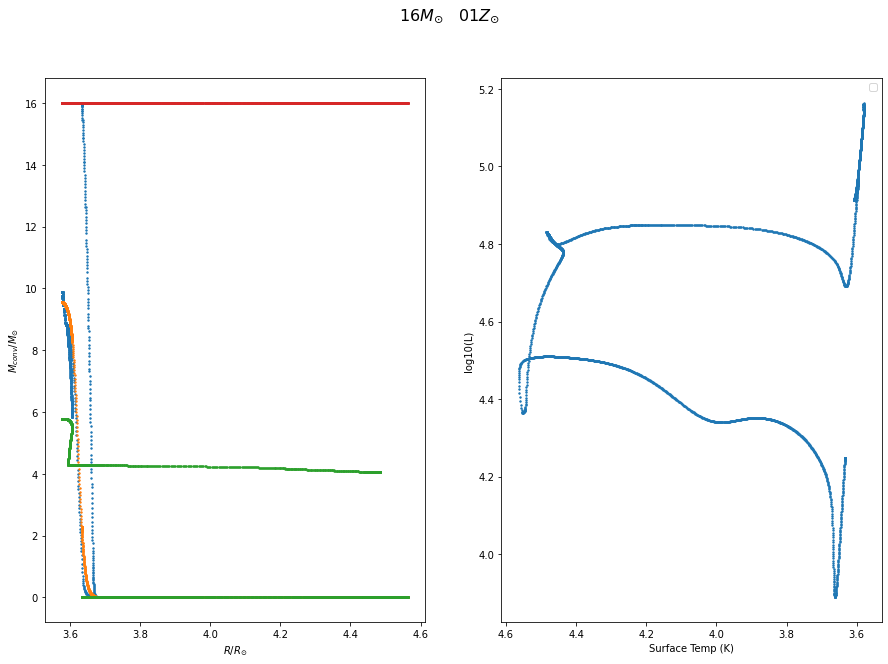

/home/lewis/Documents/Honours_Research/data/LOGS/LOGS_01Zsun_updatedovershoot/20Msun_01Zsun_sc01/history.data


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


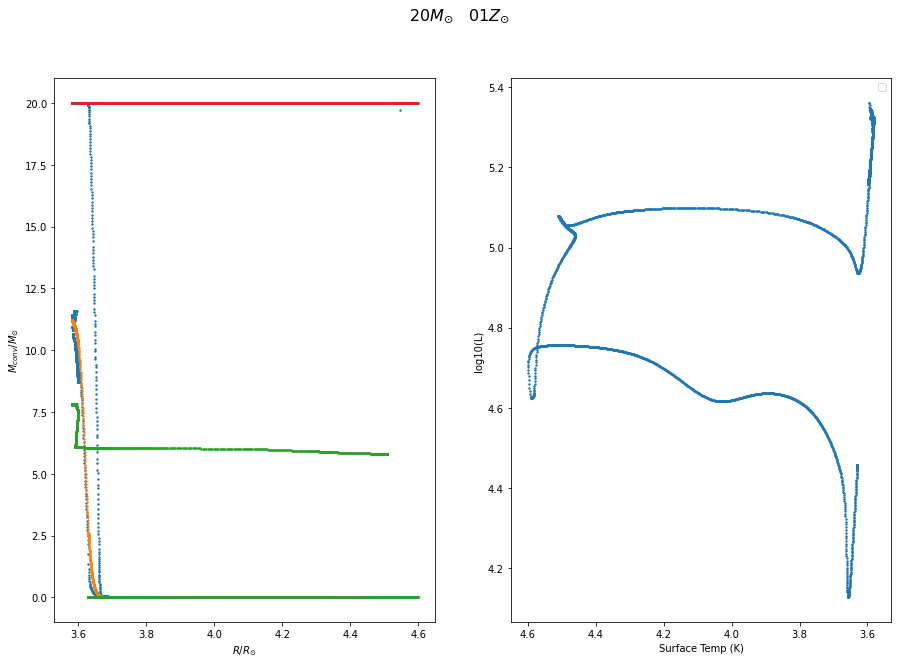

/home/lewis/Documents/Honours_Research/data/LOGS/LOGS_01Zsun_updatedovershoot/24Msun_01Zsun_sc01/history.data


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


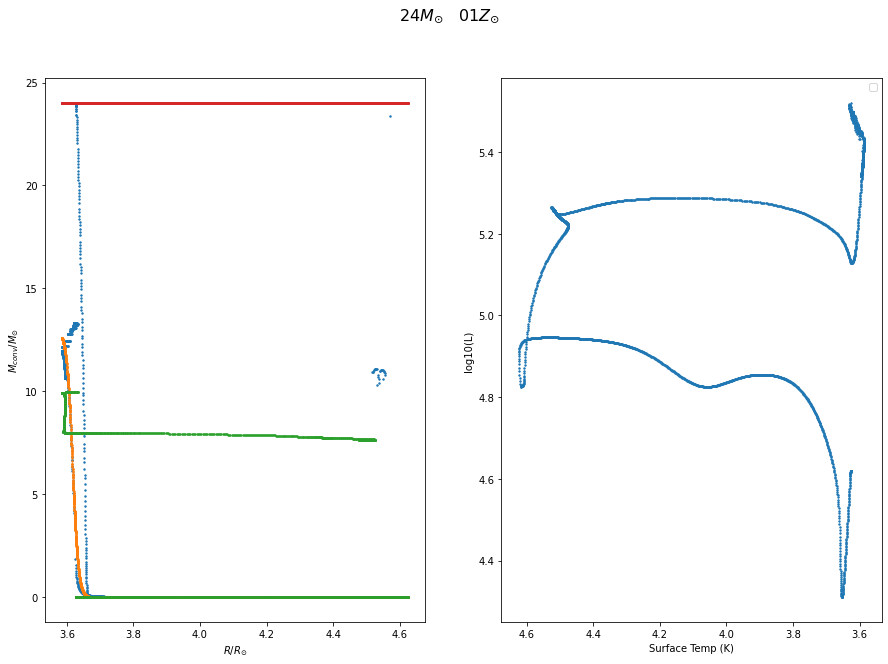

/home/lewis/Documents/Honours_Research/data/LOGS/LOGS_1Zsun_updatedovershoot/8Msun_1Zsun_sc01/history.data


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


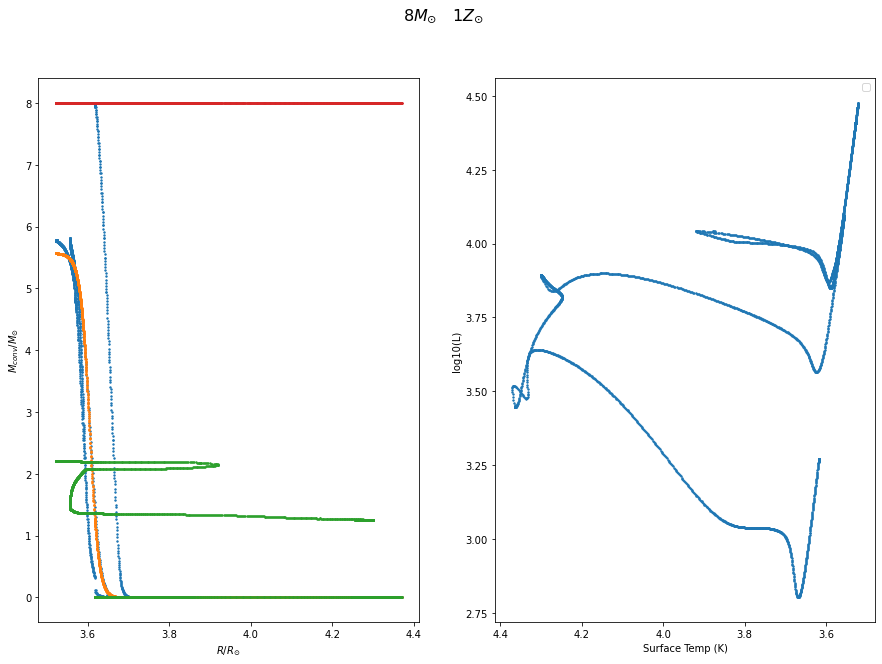

/home/lewis/Documents/Honours_Research/data/LOGS/LOGS_1Zsun_updatedovershoot/12Msun_1Zsun_sc01/history.data


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


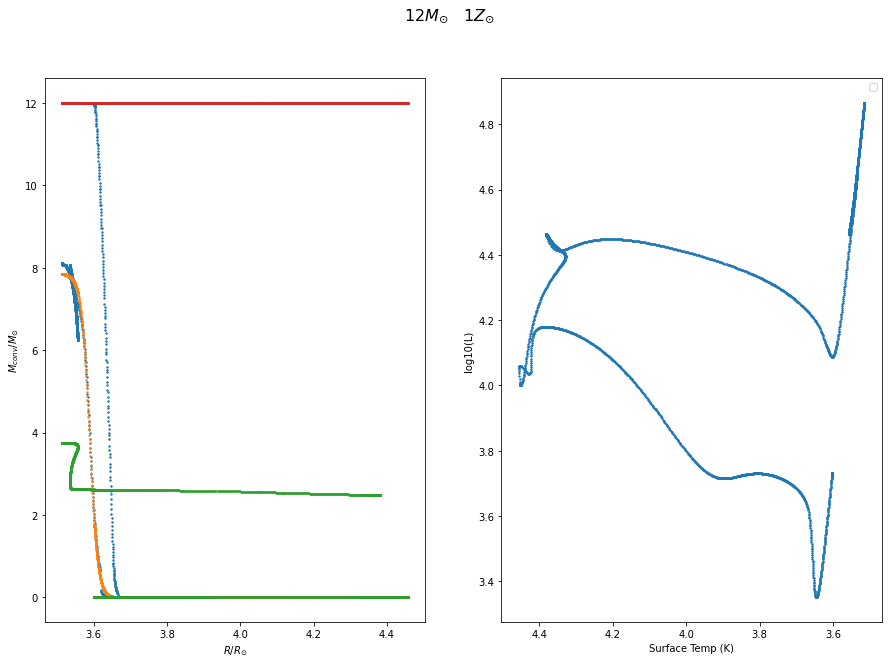

/home/lewis/Documents/Honours_Research/data/LOGS/LOGS_1Zsun_updatedovershoot/16Msun_1Zsun_sc01/history.data


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


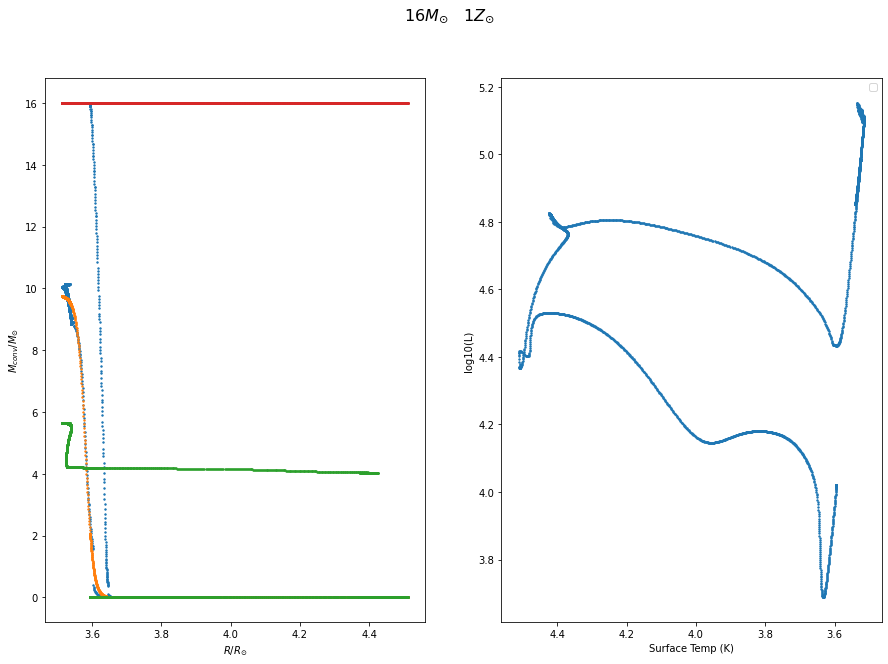

/home/lewis/Documents/Honours_Research/data/LOGS/LOGS_1Zsun_updatedovershoot/20Msun_1Zsun_sc01/history.data


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


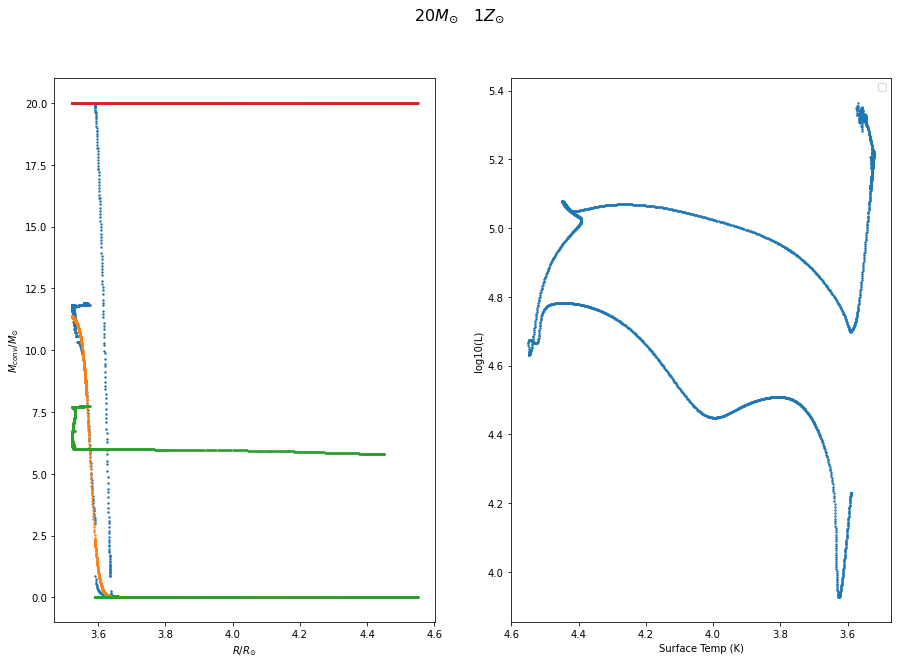

/home/lewis/Documents/Honours_Research/data/LOGS/LOGS_1Zsun_updatedovershoot/24Msun_1Zsun_sc01/history.data


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


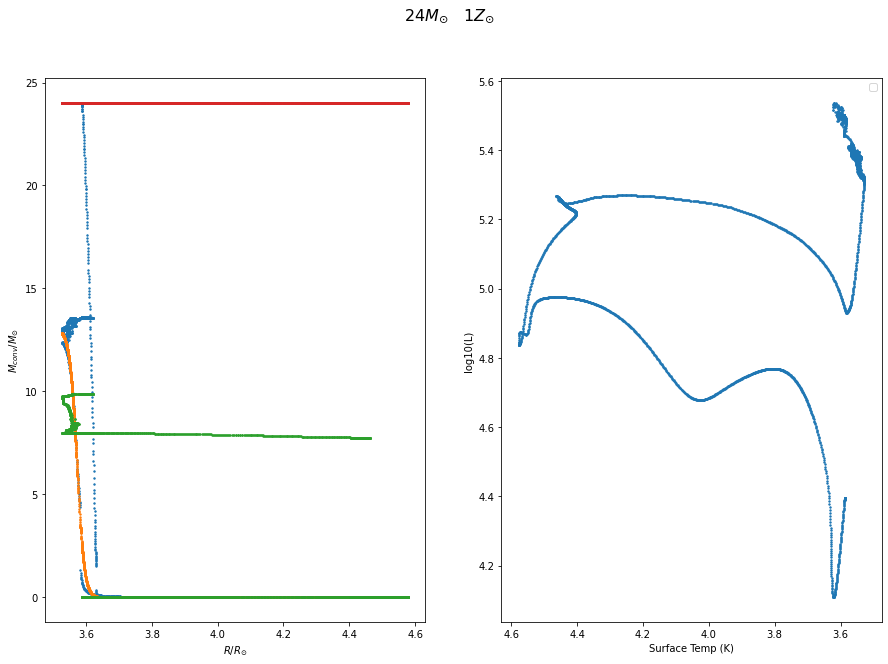

/home/lewis/Documents/Honours_Research/data/LOGS/LOGS_2Zsun_updatedovershoot/8Msun_2Zsun_sc01/history.data


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


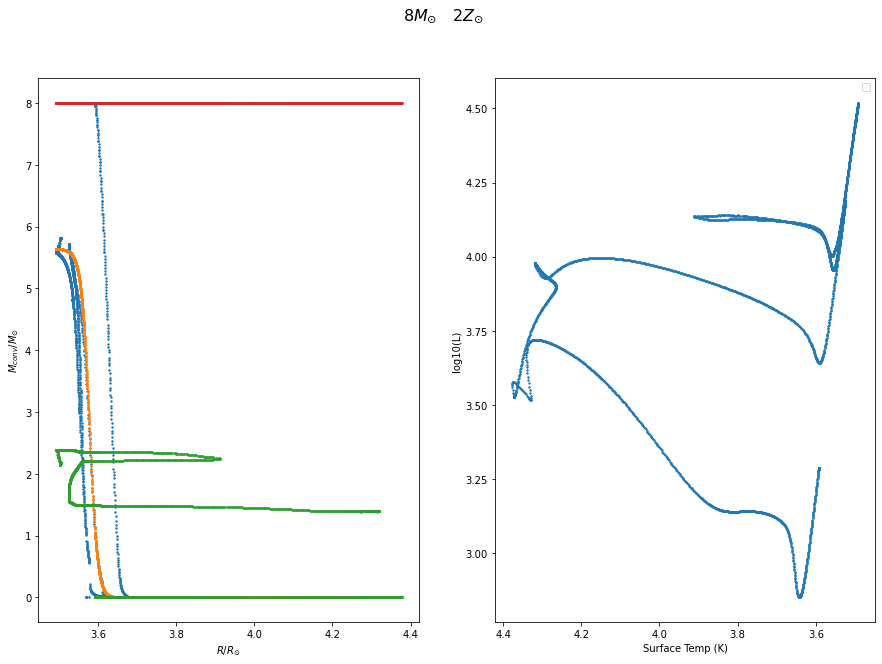

/home/lewis/Documents/Honours_Research/data/LOGS/LOGS_2Zsun_updatedovershoot/12Msun_2Zsun_sc01/history.data


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


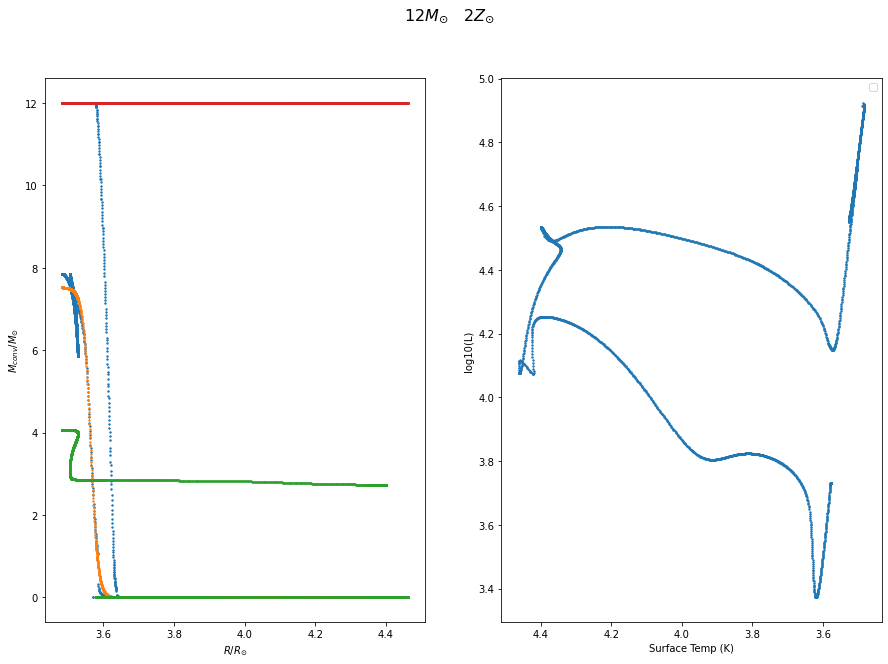

/home/lewis/Documents/Honours_Research/data/LOGS/LOGS_2Zsun_updatedovershoot/16Msun_2Zsun_sc01/history.data


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


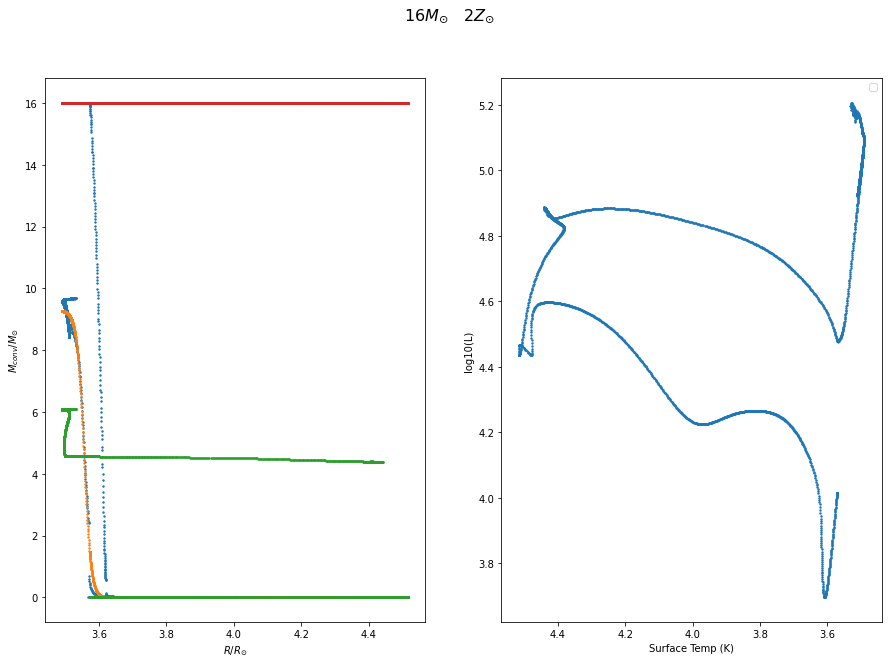

/home/lewis/Documents/Honours_Research/data/LOGS/LOGS_2Zsun_updatedovershoot/20Msun_2Zsun_sc01/history.data


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


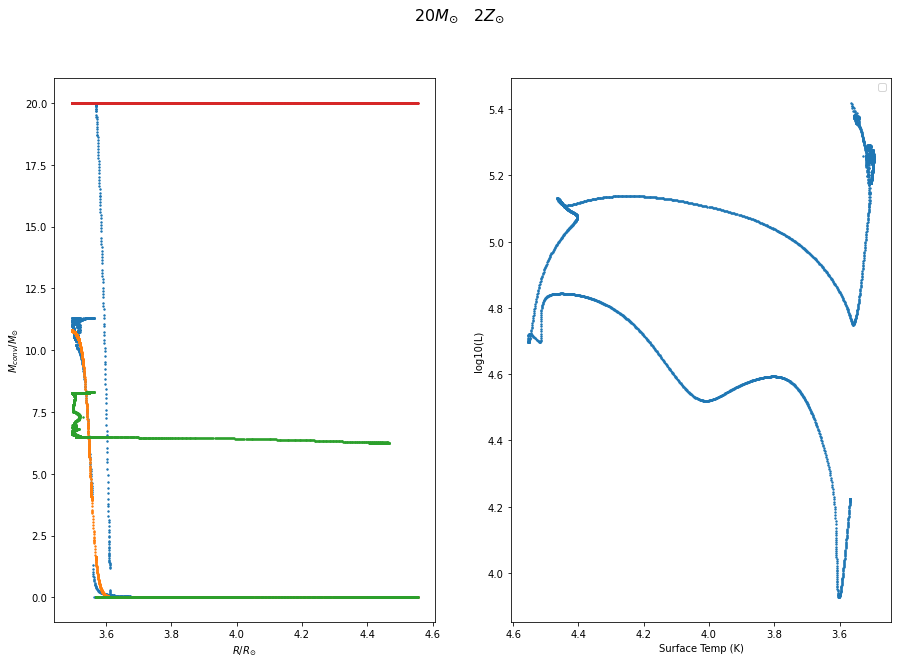

/home/lewis/Documents/Honours_Research/data/LOGS/LOGS_2Zsun_updatedovershoot/24Msun_2Zsun_sc01/history.data


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


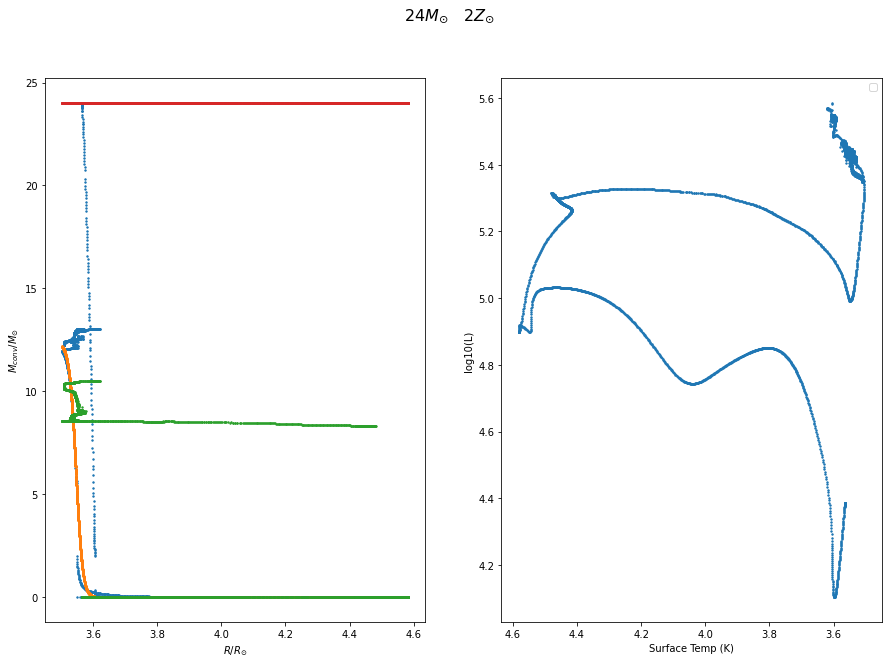

In [5]:
z_dir = ['001','01','1','2']

for i in z_dir:
    pwd = '/home/lewis/Documents/Honours_Research/data/LOGS/LOGS_' + i + 'Zsun_updatedovershoot/'
    star_mass = [8,12,16,20,24]
    for j in star_mass:

        ptf = pwd + str(j) +'Msun_' + i +'Zsun_sc01/history.data'
        print(ptf)
        h = mr.MesaData(ptf)
        tmp = []
        for k in range(len(h.star_age)):
            if (h.center_he4[k] > 0.8): #this threshhold for the concentration of he4 reaonable large threshold since peak star expansion occurs after core helium ignition
                tmp.append(h.radius_cm[k])
        r_min = min(tmp)
        index_l = int(np.where(h.radius_cm == r_min)[0][0])
        log_L_TAMS = h.log_L[index_l]
        M_core_max = h.he_core_mass[-1]
        T_eff = h.effective_T
        star_mass = h.star_mass



        if i == '001':
            z = 0.00014
        elif i == '01':
            z = 0.0014
        elif i == '1':
            z = 0.014
        else:
            z = 0.03

        b1 = b1_func(z)
        a2 = a2_func(z)
        b2 = b2_func(z)
        c2 = c2_func(z)

        M_conv_max = M_conv_max_func(star_mass, M_core_max, gamma)
        T_norm = T_norm_func(log_L_TAMS,a2,b2,c2)
        M_conv = M_conv_func(T_eff, T_norm, b1, M_conv_max)


        fig, axs = plt.subplots(1, 2,figsize=(15, 10))
        
        title = str(j) +"$M_{\odot}$   " + i + "$Z_{\odot}$"
        axs[0].scatter(np.log10(h.effective_T),h.M_conv_env/msol, label = 'data',s=2)
        axs[0].scatter(np.log10(h.effective_T),M_conv, label = 'func',s=2)
        axs[0].scatter(np.log10(h.effective_T), h.he_core_mass, label = 'Core mass',s=2)
        axs[0].scatter(np.log10(h.effective_T), h.star_mass, label = 'Total mass',s=2)
        axs[0].set_ylabel('$M_{conv}/M_{\odot}$')
        axs[0].set_xlabel('$R/R_{\odot}$')
        
        axs[1].scatter(np.log10(h.effective_T), h.log_L,s=2)
        axs[1].set_xlabel('Surface Temp (K)')
        axs[1].set_ylabel("log10(L)")
        axs[1].invert_xaxis()
        
        
        fig.suptitle(title, fontsize=16)
        plt.legend()
        plt.show()
# /home/lewis/Documents/Honours_Research/data/LOGS/LOGS_001Zsun_updatedovershoot/5Msun_001Zsun_sc01
# /home/lewis/Documents/Honours_Research/data/LOGS/LOGS_001Zsun_updatedovershoot/5Msun_001Zsun_sc01/history.data